# Taxi demand prediction in New York City


<img src='new_york.gif'>

In [1]:
#Importing Libraries
# pip3 install graphviz
#pip3 install dask
#pip3 install toolz
#pip3 install cloudpickle
# https://www.youtube.com/watch?v=ieW3G7ZzRZ0
# https://github.com/dask/dask-tutorial
# please do go through this python notebook: https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb
import dask.dataframe as dd#similar to pandas

import pandas as pd#pandas to create small dataframes 

# pip3 install foliun
# if this doesnt work refere install_folium.JPG in drive
import folium #open street map

# unix time: https://www.unixtimestamp.com/
import datetime #Convert to unix time

import time #Convert to unix time

# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays

# matplotlib: used to plot graphs
import matplotlib
# matplotlib.use('nbagg') : matplotlib uses this protocall which makes plots more user intractive like zoom in and zoom out
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  

# this lib is used while we calculate the stight line distance between two (lat,lon) pairs in miles
import gpxpy.geo #Get the haversine distance

from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

# download migwin: https://mingw-w64.org/doku.php/download/mingw-builds
# install it in your system and keep the path, migw_path ='installed path'
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

# to install xgboost: pip3 install xgboost
# if it didnt happen check install_xgboost.JPG
import xgboost as xgb
import graphviz
# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# Data Information

<p>
Ge the data from : http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml (2016 data)
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) 
</p>

## Information on taxis:

<h5> Yellow Taxi: Yellow Medallion Taxicabs</h5>
<p> These are the famous NYC yellow taxis that provide transportation exclusively through street-hails. The number of taxicabs is limited by a finite number of medallions issued by the TLC. You access this mode of transportation by standing in the street and hailing an available taxi with your hand. The pickups are not pre-arranged.</p>

<h5> For Hire Vehicles (FHVs) </h5>
<p> FHV transportation is accessed by a pre-arrangement with a dispatcher or limo company. These FHVs are not permitted to pick up passengers via street hails, as those rides are not considered pre-arranged. </p>

<h5> Green Taxi: Street Hail Livery (SHL) </h5>
<p>  The SHL program will allow livery vehicle owners to license and outfit their vehicles with green borough taxi branding, meters, credit card machines, and ultimately the right to accept street hails in addition to pre-arranged rides. </p>
<p> Credits: Quora</p>

<h5>Footnote:</h5>
In the given notebook we are considering only the yellow taxis for the time period between Jan - Mar 2015 & Jan - Mar 2016

# Data Collection
We Have collected all yellow taxi trips data from jan-2015 to dec-2016(Will be using only 2015 data)
<table>
<tr>
<th> file name </th>
<th> file name size</th>
<th> number of records </th>
<th> number of features </th>
</tr>
<tr>
<td> yellow_tripdata_2016-01 </td>
<td> 1. 59G </td>
<td> 10906858 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-02 </td>
<td> 1. 66G </td>
<td> 11382049 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-03 </td>
<td> 1. 78G </td>
<td> 12210952 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-04 </td>
<td> 1. 74G </td>
<td> 11934338 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-05 </td>
<td> 1. 73G </td>
<td> 11836853 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-06 </td>
<td> 1. 62G </td>
<td> 11135470 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-07 </td>
<td> 884Mb </td>
<td> 10294080 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-08 </td>
<td> 854Mb </td>
<td> 9942263 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-09 </td>
<td> 870Mb </td>
<td> 10116018 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-10 </td>
<td> 933Mb </td>
<td> 10854626 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-11 </td>
<td> 868Mb </td>
<td> 10102128 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-12 </td>
<td> 897Mb </td>
<td> 10449408 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-01 </td>
<td> 1.84Gb </td>
<td> 12748986 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-02 </td>
<td> 1.81Gb </td>
<td> 12450521 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-03 </td>
<td> 1.94Gb </td>
<td> 13351609 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-04 </td>
<td> 1.90Gb </td>
<td> 13071789 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-05 </td>
<td> 1.91Gb </td>
<td> 13158262 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-06 </td>
<td> 1.79Gb </td>
<td> 12324935 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-07 </td>
<td> 1.68Gb </td>
<td> 11562783 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-08 </td>
<td> 1.62Gb </td>
<td> 11130304 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-09 </td>
<td> 1.63Gb </td>
<td> 11225063 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-10 </td>
<td> 1.79Gb </td>
<td> 12315488 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-11 </td>
<td> 1.65Gb </td>
<td> 11312676 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-12 </td>
<td> 1.67Gb </td>
<td> 11460573 </td>
<td> 19 </td>
</tr>
</table>

In [2]:
#Looking at the features
# dask dataframe  : # https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb
month = dd.read_csv('yellow_tripdata_2015-01.csv')
print(month.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


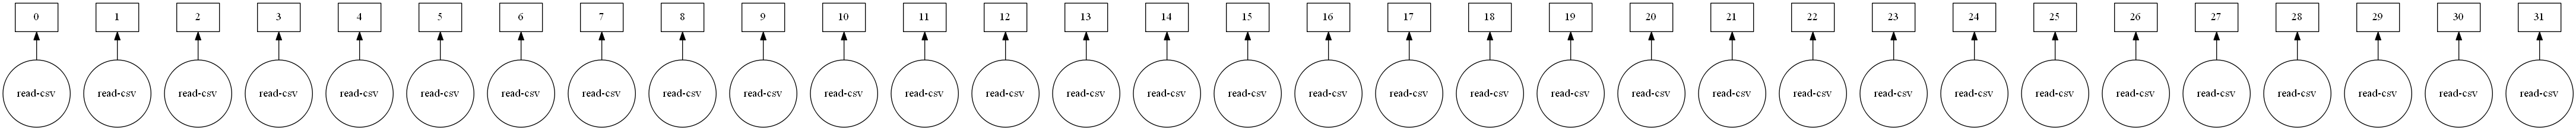

In [3]:
# However unlike Pandas, operations on dask.dataframes don't trigger immediate computation, 
# instead they add key-value pairs to an underlying Dask graph. Recall that in the diagram below, 
# circles are operations and rectangles are results.

# to see the visulaization you need to install graphviz
# pip3 install graphviz if this doesnt work please check the install_graphviz.jpg in the drive
month.visualize()

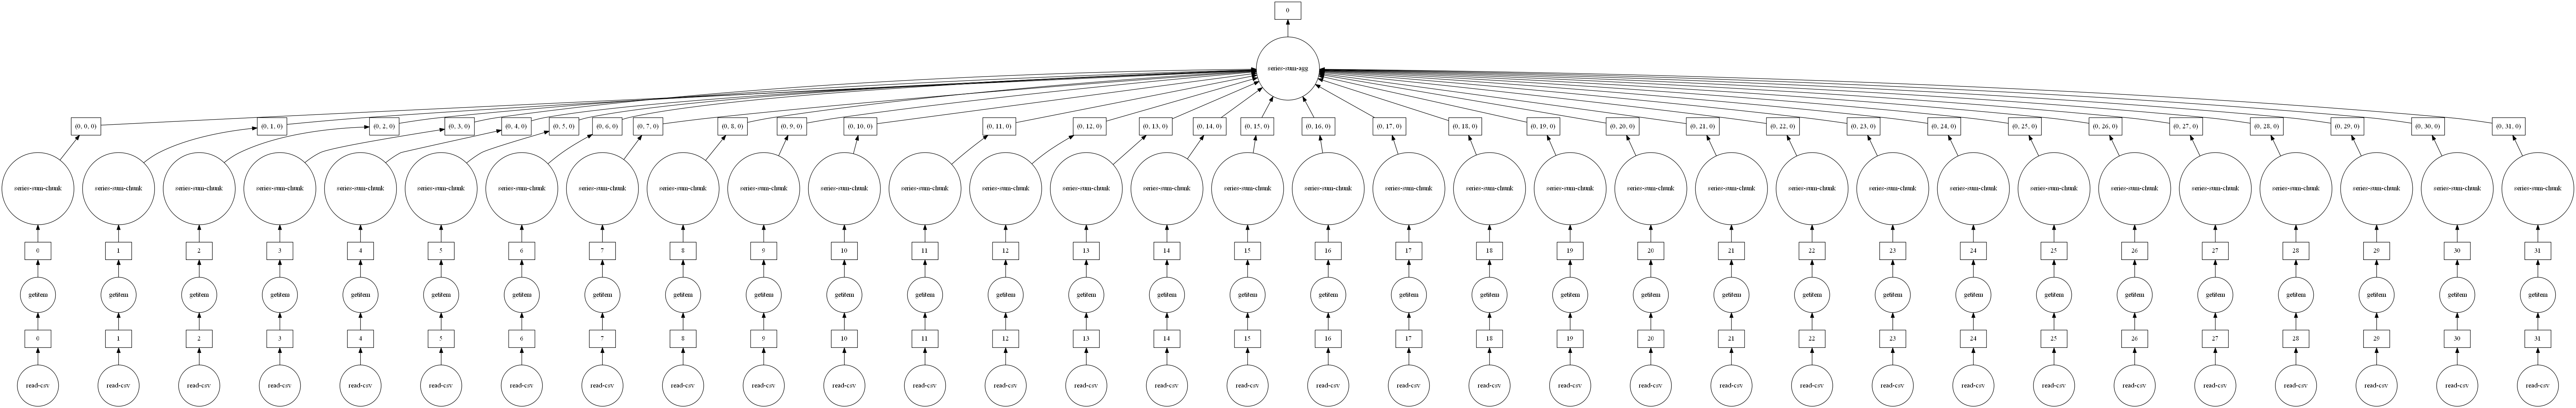

In [4]:
month.fare_amount.sum().visualize()

## Features in the dataset:
<table border="1">
	<tr>
		<th>Field Name</th>
		<th>Description</th>
	</tr>
	<tr>
		<td>VendorID</td>
		<td>
		A code indicating the TPEP provider that provided the record.
		<ol>
			<li>Creative Mobile Technologies</li>
			<li>VeriFone Inc.</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>tpep_pickup_datetime</td>
		<td>The date and time when the meter was engaged.</td>
	</tr>
	<tr>
		<td>tpep_dropoff_datetime</td>
		<td>The date and time when the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Passenger_count</td>
		<td>The number of passengers in the vehicle. This is a driver-entered value.</td>
	</tr>
	<tr>
		<td>Trip_distance</td>
		<td>The elapsed trip distance in miles reported by the taximeter.</td>
	</tr>
	<tr>
		<td>Pickup_longitude</td>
		<td>Longitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>Pickup_latitude</td>
		<td>Latitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>RateCodeID</td>
		<td>The final rate code in effect at the end of the trip.
		<ol>
			<li> Standard rate </li>
			<li> JFK </li>
			<li> Newark </li>
			<li> Nassau or Westchester</li>
			<li> Negotiated fare </li>
			<li> Group ride</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Store_and_fwd_flag</td>
		<td>This flag indicates whether the trip record was held in vehicle memory before sending to the vendor,<br\> aka “store and forward,” because the vehicle did not have a connection to the server.
		<br\>Y= store and forward trip
		<br\>N= not a store and forward trip
		</td>
	</tr>

	<tr>
		<td>Dropoff_longitude</td>
		<td>Longitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Dropoff_ latitude</td>
		<td>Latitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Payment_type</td>
		<td>A numeric code signifying how the passenger paid for the trip.
		<ol>
			<li> Credit card </li>
			<li> Cash </li>
			<li> No charge </li>
			<li> Dispute</li>
			<li> Unknown </li>
			<li> Voided trip</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Fare_amount</td>
		<td>The time-and-distance fare calculated by the meter.</td>
	</tr>
	<tr>
		<td>Extra</td>
		<td>Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges.</td>
	</tr>
	<tr>
		<td>MTA_tax</td>
		<td>0.50 MTA tax that is automatically triggered based on the metered rate in use.</td>
	</tr>
	<tr>
		<td>Improvement_surcharge</td>
		<td>0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.</td>
	</tr>
	<tr>
		<td>Tip_amount</td>
		<td>Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.</td>
	</tr>
	<tr>
		<td>Tolls_amount</td>
		<td>Total amount of all tolls paid in trip.</td>
	</tr>
	<tr>
		<td>Total_amount</td>
		<td>The total amount charged to passengers. Does not include cash tips.</td>
	</tr>
</table>

# ML Problem Formulation
<p><b> Time-series forecasting and Regression</b></p>
<br>
-<i> To find number of pickups, given location cordinates(latitude and longitude) and time, in the query reigion and surrounding regions.</i>
<p> 
To solve the above we would be using data collected in Jan - Mar 2015 to predict the pickups in Jan - Mar 2016.
</p>

# Performance metrics
1. Mean Absolute percentage error.
2. Mean Squared error.

## Data Cleaning

In this section we will be doing univariate analysis and removing outlier/illegitimate values which may be caused due to some error

In [5]:
#table below shows few datapoints along with all our features
month.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


### 1. Pickup Latitude and Pickup Longitude

It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with pickups which originate within New York.

In [292]:
# Plotting pickup cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.pickup_longitude <= -74.15) | (month.pickup_latitude <= 40.5774)| \
                   (month.pickup_longitude >= -73.7004) | (month.pickup_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
map_osm

<b>Observation:-</b> As you can see above that there are some points just outside the boundary but there are a few that are in either South america, Mexico or Canada

### 2. Dropoff Latitude & Dropoff Longitude

It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with dropoffs which are within New York.

In [293]:
outlier_locations = month[((month.dropoff_longitude <= -74.15) | (month.dropoff_latitude <= 40.5774)| \
                   (month.dropoff_longitude >= -73.7004) | (month.dropoff_latitude >= 40.9176))]
## consider sample outlier points
sample_outleir = outlier_locations.head(1000)
map_  = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

for i,j in zip(sample_outleir['dropoff_latitude'],sample_outleir['dropoff_longitude']):
    folium.Marker([i,j]).add_to(map_)
map_    

<b>Observation:-</b> The observations here are similar to those obtained while analysing pickup latitude and longitude

### 3. Trip Durations:

<p style="font-size:18px">According to NYC Taxi &amp; Limousine Commision Regulations <b style= "color:blue">the maximum allowed trip duration in a 24 hour interval is 12 hours.</b> </p>

In [8]:
#The timestamps are converted to unix so as to get duration(trip-time) & speed also pickup-times in unix are used while binning 

# in out data we have time in the formate "YYYY-MM-DD HH:MM:SS" we convert thiss sting to python time formate and then into unix time stamp
# https://stackoverflow.com/a/27914405
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())

# we return a data frame which contains the columns
# 1.'passenger_count' : self explanatory
# 2.'trip_distance' : self explanatory
# 3.'pickup_longitude' : self explanatory
# 4.'pickup_latitude' : self explanatory
# 5.'dropoff_longitude' : self explanatory
# 6.'dropoff_latitude' : self explanatory
# 7.'total_amount' : total fair that was paid
# 8.'trip_times' : duration of each trip
# 9.'pickup_times : pickup time converted into unix time 
# 10.'Speed' : velocity of each trip

def return_with_trip_times(month):
    duration = month[['tpep_pickup_datetime','tpep_dropoff_datetime']].compute()
    #pickups and dropoffs to unix time
    duration_pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]
    duration_drop = [convert_to_unix(x) for x in duration['tpep_dropoff_datetime'].values]
    #calculate duration of tripsduration_drop
    durations = (np.array(duration_drop) - np.array(duration_pickup))/float(60)

    #append durations of trips and speed in miles/hr to a new dataframe
    new_frame = month[['passenger_count','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].compute()
    
    new_frame['trip_times'] = durations
    new_frame['pickup_times'] = duration_pickup
    new_frame['Speed'] = 60*(new_frame['trip_distance']/new_frame['trip_times'])
    
    return new_frame

frame_with_durations = return_with_trip_times(month)

<IPython.core.display.Javascript object>


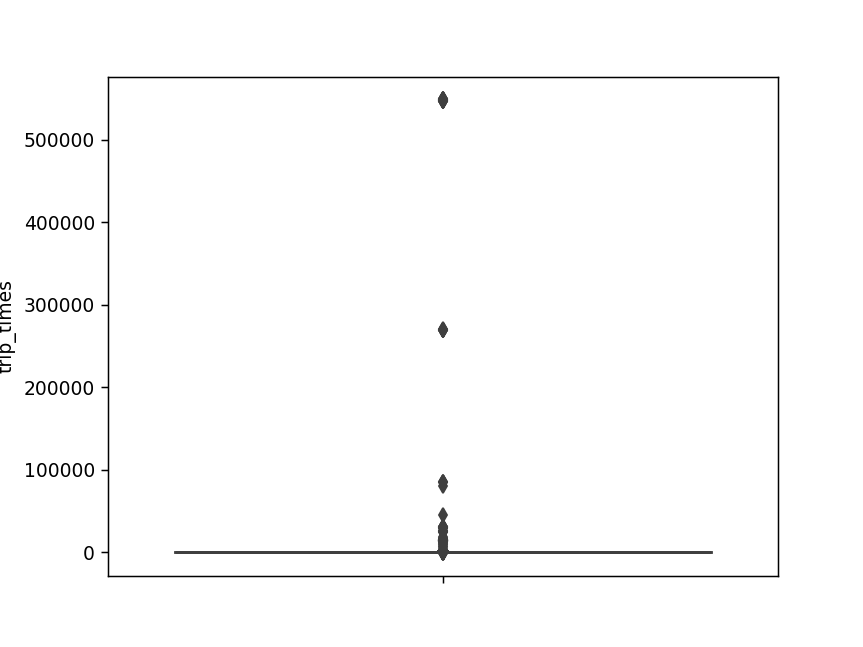

In [9]:
# the skewed box plot shows us the presence of outliers 
sns.boxplot(y="trip_times", data =frame_with_durations)
plt.show()

In [10]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var = frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -1211.0166666666667
10 percentile value is 3.8333333333333335
20 percentile value is 5.383333333333334
30 percentile value is 6.816666666666666
40 percentile value is 8.3
50 percentile value is 9.95
60 percentile value is 11.866666666666667
70 percentile value is 14.283333333333333
80 percentile value is 17.633333333333333
90 percentile value is 23.45
100 percentile value is  548555.6333333333


In [11]:
#looking further from the 99th percecntile
for i in range(90,100):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 23.45
91 percentile value is 24.35
92 percentile value is 25.383333333333333
93 percentile value is 26.55
94 percentile value is 27.933333333333334
95 percentile value is 29.583333333333332
96 percentile value is 31.683333333333334
97 percentile value is 34.46666666666667
98 percentile value is 38.71666666666667
99 percentile value is 46.75
100 percentile value is  548555.6333333333


In [12]:
#removing data based on our analysis and TLC regulations
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_times>1) & (frame_with_durations.trip_times< 720)]

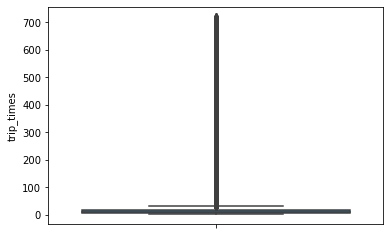

In [13]:
#box-plot after removal of outliers
%matplotlib inline
sns.boxplot(y="trip_times", data =frame_with_durations_modified)
plt.show()

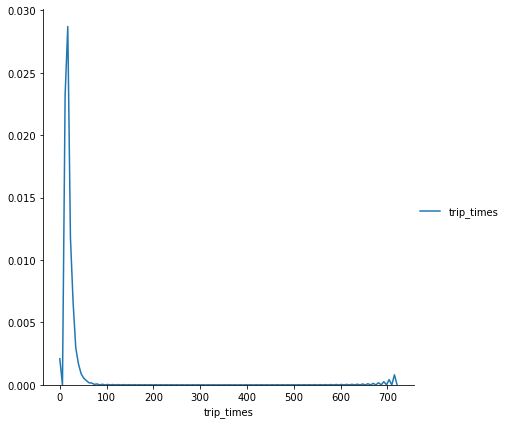

In [14]:
#pdf of trip-times after removing the outliers
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"trip_times") \
      .add_legend();
plt.show();

In [15]:
#converting the values to log-values to chec for log-normal
import math
frame_with_durations_modified['log_times']=[math.log(i) for i in frame_with_durations_modified['trip_times'].values]

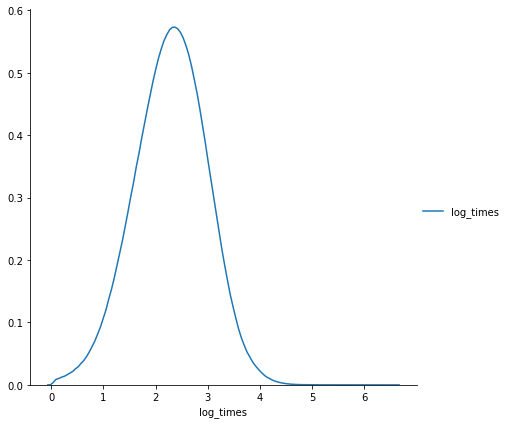

In [16]:
#pdf of log-values
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"log_times") \
      .add_legend();
plt.show();

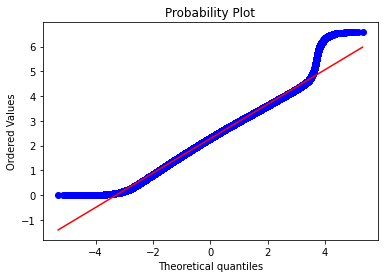

In [17]:
#Q-Q plot for checking if trip-times is log-normal
import scipy
scipy.stats.probplot(frame_with_durations_modified['log_times'].values, plot=plt)
plt.show()

### 4. Speed

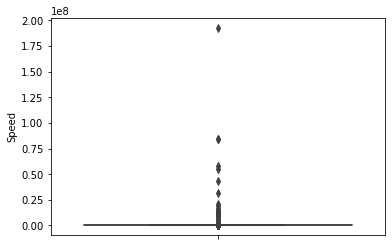

In [18]:
# check for any outliers in the data after trip duration outliers removed
# box-plot for speeds with outliers
frame_with_durations_modified['Speed'] = 60*(frame_with_durations_modified['trip_distance']/frame_with_durations_modified['trip_times'])
sns.boxplot(y="Speed", data =frame_with_durations_modified)
plt.show()

In [19]:
#calculating speed values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 6.409495548961425
20 percentile value is 7.80952380952381
30 percentile value is 8.929133858267717
40 percentile value is 9.98019801980198
50 percentile value is 11.06865671641791
60 percentile value is 12.286689419795222
70 percentile value is 13.796407185628745
80 percentile value is 15.963224893917962
90 percentile value is 20.186915887850468
100 percentile value is  192857142.85714284


In [20]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 20.186915887850468
91 percentile value is 20.91645569620253
92 percentile value is 21.752988047808763
93 percentile value is 22.721893491124263
94 percentile value is 23.844155844155843
95 percentile value is 25.182552504038775
96 percentile value is 26.80851063829787
97 percentile value is 28.84304932735426
98 percentile value is 31.591128254580514
99 percentile value is 35.7513566847558
100 percentile value is  192857142.85714284


In [21]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 35.7513566847558
99.1 percentile value is 36.31084727468969
99.2 percentile value is 36.91470054446461
99.3 percentile value is 37.588235294117645
99.4 percentile value is 38.33035714285714
99.5 percentile value is 39.17580340264651
99.6 percentile value is 40.15384615384615
99.7 percentile value is 41.338301043219076
99.8 percentile value is 42.86631016042781
99.9 percentile value is 45.3107822410148
100 percentile value is  192857142.85714284


In [22]:
#removing further outliers based on the 99.9th percentile value
frame_with_durations_modified=frame_with_durations[(frame_with_durations.Speed>0) & (frame_with_durations.Speed<45.31)]

In [23]:
#avg.speed of cabs in New-York
sum(frame_with_durations_modified["Speed"]) / float(len(frame_with_durations_modified["Speed"]))

12.450173996027528

<b style='font-size:16px'>The avg speed in Newyork speed is 12.45miles/hr, so a cab driver can travel <font color='blue'> 2 miles per 10min on avg.</font> </b>

### 4. Trip Distance

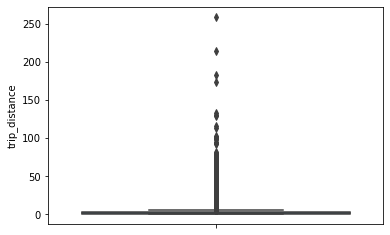

In [24]:
# up to now we have removed the outliers based on trip durations and cab speeds
# lets try if there are any outliers in trip distances
# box-plot showing outliers in trip-distance values
sns.boxplot(y="trip_distance", data =frame_with_durations_modified)
plt.show()

In [25]:
#calculating trip distance values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.01
10 percentile value is 0.66
20 percentile value is 0.9
30 percentile value is 1.1
40 percentile value is 1.39
50 percentile value is 1.69
60 percentile value is 2.07
70 percentile value is 2.6
80 percentile value is 3.6
90 percentile value is 5.97
100 percentile value is  258.9


In [26]:
#calculating trip distance values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 5.97
91 percentile value is 6.45
92 percentile value is 7.07
93 percentile value is 7.85
94 percentile value is 8.72
95 percentile value is 9.6
96 percentile value is 10.6
97 percentile value is 12.1
98 percentile value is 16.03
99 percentile value is 18.17
100 percentile value is  258.9


In [27]:
#calculating trip distance values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 18.17
99.1 percentile value is 18.37
99.2 percentile value is 18.6
99.3 percentile value is 18.83
99.4 percentile value is 19.13
99.5 percentile value is 19.5
99.6 percentile value is 19.96
99.7 percentile value is 20.5
99.8 percentile value is 21.22
99.9 percentile value is 22.57
100 percentile value is  258.9


In [28]:
#removing further outliers based on the 99.9th percentile value
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_distance>0) & (frame_with_durations.trip_distance<23)]

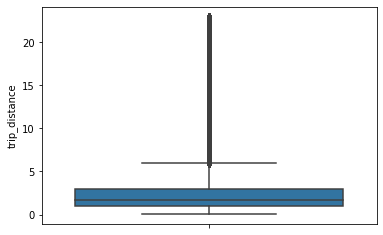

In [29]:
#box-plot after removal of outliers
sns.boxplot(y="trip_distance", data = frame_with_durations_modified)
plt.show()

### 5. Total Fare

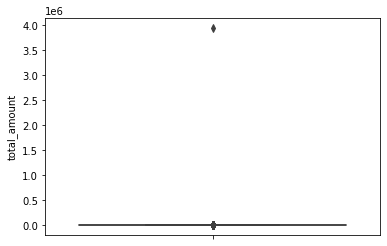

In [30]:
# up to now we have removed the outliers based on trip durations, cab speeds, and trip distances
# lets try if there are any outliers in based on the total_amount
# box-plot showing outliers in fare
sns.boxplot(y="total_amount", data =frame_with_durations_modified)
plt.show()

In [31]:
#calculating total fare amount values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -242.55
10 percentile value is 6.3
20 percentile value is 7.8
30 percentile value is 8.8
40 percentile value is 9.8
50 percentile value is 11.16
60 percentile value is 12.8
70 percentile value is 14.8
80 percentile value is 18.3
90 percentile value is 25.8
100 percentile value is  3950611.6


In [32]:
#calculating total fare amount values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 25.8
91 percentile value is 27.3
92 percentile value is 29.3
93 percentile value is 31.8
94 percentile value is 34.8
95 percentile value is 38.53
96 percentile value is 42.6
97 percentile value is 48.13
98 percentile value is 58.13
99 percentile value is 66.13
100 percentile value is  3950611.6


In [33]:
#calculating total fare amount values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 66.13
99.1 percentile value is 68.13
99.2 percentile value is 69.6
99.3 percentile value is 69.6
99.4 percentile value is 69.73
99.5 percentile value is 69.75
99.6 percentile value is 69.76
99.7 percentile value is 72.58
99.8 percentile value is 75.35
99.9 percentile value is 88.28
100 percentile value is  3950611.6


<b>Observation:-</b> As even the 99.9th percentile value doesnt look like an outlier,as there is not much difference between the 99.8th percentile and 99.9th percentile, we move on to do graphical analyis

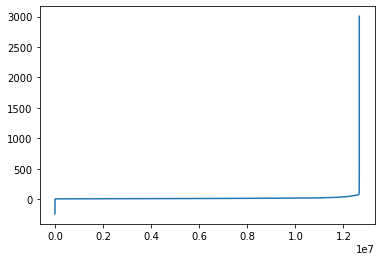

In [34]:
#below plot shows us the fare values(sorted) to find a sharp increase to remove those values as outliers
# plot the fare amount excluding last two values in sorted data
plt.plot(var[:-2])
plt.show()

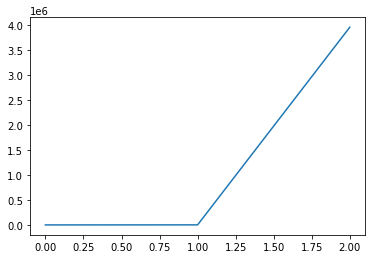

In [35]:
# a very sharp increase in fare values can be seen 
# plotting last three total fare values, and we can observe there is share increase in the values
plt.plot(var[-3:])
plt.show()

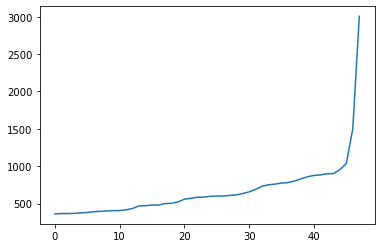

In [36]:
# now looking at values not including the last two points we again find a drastic increase at around 1000 fare value
# we plot last 50 values excluding last two values
plt.plot(var[-50:-2])
plt.show()

## Remove all outliers/erronous points.

In [37]:
#removing all outliers based on our univariate analysis above
def remove_outliers(new_frame):
    a = new_frame.shape[0]
    print ("Number of pickup records = ",a)
    temp_frame = new_frame[((new_frame.dropoff_longitude >= -74.15) & (new_frame.dropoff_longitude <= -73.7004) &\
                       (new_frame.dropoff_latitude >= 40.5774) & (new_frame.dropoff_latitude <= 40.9176)) & \
                       ((new_frame.pickup_longitude >= -74.15) & (new_frame.pickup_latitude >= 40.5774)& \
                       (new_frame.pickup_longitude <= -73.7004) & (new_frame.pickup_latitude <= 40.9176))]
    b = temp_frame.shape[0]
    print ("Number of outlier coordinates lying outside NY boundaries:",(a-b))

    
    temp_frame = new_frame[(new_frame.trip_times > 0) & (new_frame.trip_times < 720)]
    c = temp_frame.shape[0]
    print ("Number of outliers from trip times analysis:",(a-c))
    
    
    temp_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    d = temp_frame.shape[0]
    print ("Number of outliers from trip distance analysis:",(a-d))
    
    temp_frame = new_frame[(new_frame.Speed <= 65) & (new_frame.Speed >= 0)]
    e = temp_frame.shape[0]
    print ("Number of outliers from speed analysis:",(a-e))
    
    temp_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    f = temp_frame.shape[0]
    print ("Number of outliers from fare analysis:",(a-f))
    
    
    new_frame = new_frame[((new_frame.dropoff_longitude >= -74.15) & (new_frame.dropoff_longitude <= -73.7004) &\
                       (new_frame.dropoff_latitude >= 40.5774) & (new_frame.dropoff_latitude <= 40.9176)) & \
                       ((new_frame.pickup_longitude >= -74.15) & (new_frame.pickup_latitude >= 40.5774)& \
                       (new_frame.pickup_longitude <= -73.7004) & (new_frame.pickup_latitude <= 40.9176))]
    
    new_frame = new_frame[(new_frame.trip_times > 0) & (new_frame.trip_times < 720)]
    new_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    new_frame = new_frame[(new_frame.Speed < 45.31) & (new_frame.Speed > 0)]
    new_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    
    print ("Total outliers removed",a - new_frame.shape[0])
    print ("---")
    return new_frame

In [38]:
print ("Removing outliers in the month of Jan-2015")
print ("----")
frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)
print("fraction of data points that remain after removing outliers", float(len(frame_with_durations_outliers_removed))/len(frame_with_durations))

Removing outliers in the month of Jan-2015
----
Number of pickup records =  12748986
Number of outlier coordinates lying outside NY boundaries: 293919
Number of outliers from trip times analysis: 23889
Number of outliers from trip distance analysis: 92597
Number of outliers from speed analysis: 24473
Number of outliers from fare analysis: 5275
Total outliers removed 377910
---
fraction of data points that remain after removing outliers 0.9703576425607495


# Data-preperation
## Clustering/Segmentation

In [39]:
### we are gonna create different clusters first from 10 to 100 
## then we will send the cluster len and cluster_centers to our functions to find points within distance of 2 miles 
coords = frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']].values
neighbors = []
def find_min_distance(cluster_centers,cluster_len):
    ## function that finds min distance between two coordinates
    ## And average good neigbors between two points and average bad neighbors between two points
    less_,more_ = [],[]
    min_dist = 1000
    for i in range(0,cluster_len):
        nice_points,wrong_points = 0,0
        for j in range(0,cluster_len):
            if j!=i:
                distance = gpxpy.geo.haversine_distance(cluster_centers[i][0],cluster_centers[i][1],
                                                        cluster_centers[j][0],cluster_centers[j][1])
                distance = distance/(1.60934*1000)
                min_dist = min(distance,min_dist)
                if distance <= 2:
                    nice_points+=1
                else:
                    wrong_points+=1            
        less_.append(nice_points)
        more_.append(wrong_points)
    
    neighbors.append(less_)
    print('After choosing the clusters with length ',cluster_len)
    print('*'*10)
    print('Average number of points with intercluster distance <= 2 ',np.ceil(sum(less_)/len(less_)))
    print('Average number of points with intercluster distance > 2 ',np.ceil(sum(more_)/len(more_)))
    print('Minimum distance calculated to be :',min_dist)
    print('*'*10)
    
def find_centroids(increment):
    kmeans = MiniBatchKMeans(n_clusters=increment,batch_size=1000,random_state=42).fit(coords)
    frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(coords)
    cluster_centers = kmeans.cluster_centers_
    cluster_len = len(cluster_centers)
    return cluster_centers,cluster_len

for increment in range(10,100,10):
    cluster_centers,cluster_len = find_centroids(increment)
    find_min_distance(cluster_centers,cluster_len)

After choosing the clusters with length  10
**********
Average number of points with intercluster distance <= 2  2.0
Average number of points with intercluster distance > 2  8.0
Minimum distance calculated to be : 1.1192643504338826
**********
After choosing the clusters with length  20
**********
Average number of points with intercluster distance <= 2  5.0
Average number of points with intercluster distance > 2  15.0
Minimum distance calculated to be : 0.5068296118318109
**********
After choosing the clusters with length  30
**********
Average number of points with intercluster distance <= 2  8.0
Average number of points with intercluster distance > 2  22.0
Minimum distance calculated to be : 0.2977082261311233
**********
After choosing the clusters with length  40
**********
Average number of points with intercluster distance <= 2  10.0
Average number of points with intercluster distance > 2  30.0
Minimum distance calculated to be : 0.3486854241772553
**********
After choosing the c

### Inference:
- The main objective was to find a optimal min. distance(Which roughly estimates to the radius of a cluster) between the clusters which we got was 20.
- We need minimum distance to be atleast 0.5 miles.

In [40]:
frame_with_durations_outliers_removed

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_times,pickup_times,Speed,pickup_cluster
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421329e+09,5.285319,0
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420902e+09,9.983193,34
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420902e+09,10.746269,8
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420902e+09,16.071429,54
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420902e+09,9.318378,44
...,...,...,...,...,...,...,...,...,...,...,...
12615,2,1.00,-73.951988,40.786217,-73.953735,40.775162,7.55,3.933333,1.420897e+09,15.254237,33
12616,2,0.80,-73.982742,40.728184,-73.974976,40.720013,8.80,5.700000,1.420897e+09,8.421053,23
12617,1,3.40,-73.979324,40.749550,-73.969101,40.787800,14.30,13.283333,1.420897e+09,15.357591,45
12618,1,1.30,-73.999565,40.738483,-73.981819,40.737652,13.55,15.316667,1.420897e+09,5.092492,11


In [41]:
kmeans =  MiniBatchKMeans(n_clusters=20,batch_size=1000,random_state=42).fit(coords)
frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])

### Plotting the cluster centers:

In [294]:
# Plotting the cluster centers on OSM
cluster_centers = kmeans.cluster_centers_
cluster_len = len(cluster_centers)
map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')
for i in range(cluster_len):
    folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])),
                  popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

### Plotting the cluster 

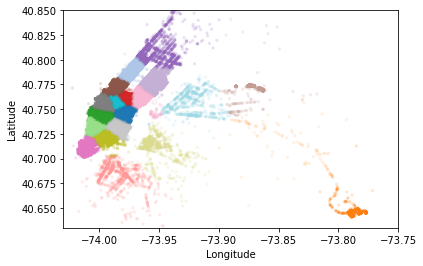

In [43]:
def plot_cluster(frame):
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    fig,ax = plt.subplots(ncols=1,nrows=1)
    plt.scatter(frame.pickup_longitude.values[:100000], frame.pickup_latitude.values[:100000],s=10, lw=0
                ,c=frame.pickup_cluster.values[:100000],cmap='tab20', alpha=0.2)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()
    
plot_cluster(frame_with_durations_outliers_removed)    

## Time-binning

In [44]:
#Refer:https://www.unixtimestamp.com/
# 1420070400 : 2015-01-01 00:00:00 
# 1422748800 : 2015-02-01 00:00:00 
# 1425168000 : 2015-03-01 00:00:00
# 1427846400 : 2015-04-01 00:00:00 
# 1430438400 : 2015-05-01 00:00:00 
# 1433116800 : 2015-06-01 00:00:00
# 1451606400 : 2016-01-01 00:00:00 
# 1454284800 : 2016-02-01 00:00:00 
# 1456790400 : 2016-03-01 00:00:00
# 1459468800 : 2016-04-01 00:00:00 
# 1462060800 : 2016-05-01 00:00:00 
# 1464739200 : 2016-06-01 00:00:00

def add_pickup_bins(frame,month,year):
    unix_pickup_times = [i for i in frame['pickup_times'].values]
    unix_times = [[1420070400,1422748800,1425168000,1427846400,1430438400,1433116800],\
                    [1451606400,1454284800,1456790400,1459468800,1462060800,1464739200]]
    
    start_pickup_unix = unix_times[year-2015][month-1]   
    # https://www.timeanddate.com/time/zones/est
    # (int((i-start_pickup_unix)/600)+33) : our unix time is in gmt to we are converting it to est
    tenminutewise_binned_unix_pickup_times = [(int((i-start_pickup_unix)/600)+33) for i in unix_pickup_times]
    frame['pickup_bins'] = np.array(tenminutewise_binned_unix_pickup_times)
    
    return frame

In [45]:
# clustering, making pickup bins and grouping by pickup cluster and pickup bins
frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
jan_2015_frame = add_pickup_bins(frame_with_durations_outliers_removed,1,2015)
jan_2015_groupby = jan_2015_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()

In [46]:
# hear the trip_distance represents the number of pickups that are happend in that particular 10min intravel
# this data frame has two indices
# primary index: pickup_cluster (cluster number)
# secondary index : pickup_bins (we devid whole months time into 10min intravels 24*31*60/10 =4464bins)
jan_2015_groupby.head()

trip_distance
pickup_cluster pickup_bins               
0              1                      167
               2                      340
               3                      432
               4                      514
               5                      520

In [47]:
# upto now we cleaned data and prepared data for the month 2015,

# now do the same operations for months Jan, Feb, March of 2016
# 1. get the dataframe which inlcudes only required colums
# 2. adding trip times, speed, unix time stamp of pickup_time
# 4. remove the outliers based on trip_times, speed, trip_duration, total_amount
# 5. add pickup_cluster to each data point
# 6. add pickup_bin (index of 10min intravel to which that trip belongs to)
# 7. group by data, based on 'pickup_cluster' and 'pickuo_bin'

# Data Preparation for the months of Jan,Feb and March 2016
def datapreparation(month,kmeans,month_no,year_no):
    
    print ("Return with trip times..")

    frame_with_durations = return_with_trip_times(month)
    
    print ("Remove outliers..")
    frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)
    
    print ("Estimating clusters..")
    frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    #frame_with_durations_outliers_removed_2016['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed_2016[['pickup_latitude', 'pickup_longitude']])

    print ("Final groupbying..")
    final_updated_frame = add_pickup_bins(frame_with_durations_outliers_removed,month_no,year_no)
    final_groupby_frame = final_updated_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()
    
    return final_updated_frame,final_groupby_frame
    
month_jan_2016 = dd.read_csv('yellow_tripdata_2016-01.csv')
month_feb_2016 = dd.read_csv('yellow_tripdata_2016-02.csv')
month_mar_2016 = dd.read_csv('yellow_tripdata_2016-03.csv')

jan_2016_frame,jan_2016_groupby = datapreparation(month_jan_2016,kmeans,1,2016)
feb_2016_frame,feb_2016_groupby = datapreparation(month_feb_2016,kmeans,2,2016)
mar_2016_frame,mar_2016_groupby = datapreparation(month_mar_2016,kmeans,3,2016)

Return with trip times..
Remove outliers..
Number of pickup records =  10906858
Number of outlier coordinates lying outside NY boundaries: 214677
Number of outliers from trip times analysis: 27190
Number of outliers from trip distance analysis: 79742
Number of outliers from speed analysis: 21047
Number of outliers from fare analysis: 4991
Total outliers removed 297784
---
Estimating clusters..
Final groupbying..
Return with trip times..
Remove outliers..
Number of pickup records =  11382049
Number of outlier coordinates lying outside NY boundaries: 223161
Number of outliers from trip times analysis: 27670
Number of outliers from trip distance analysis: 81902
Number of outliers from speed analysis: 22437
Number of outliers from fare analysis: 5476
Total outliers removed 308177
---
Estimating clusters..
Final groupbying..
Return with trip times..
Remove outliers..
Number of pickup records =  12210952
Number of outlier coordinates lying outside NY boundaries: 232444
Number of outliers fro

## Smoothing

In [48]:
# Gets the unique bins where pickup values are present for each each reigion
# for each cluster region we will collect all the indices of 10min intravels in which the pickups are happened
# we got an observation that there are some pickpbins that doesnt have any pickups
def return_unq_pickupbins(frame):
    values=[]
    for i in range(0,20):
        new =  frame[frame['pickup_cluster'] == i ]
        list_unq = list(set(new['pickup_bins']))
        list_unq.sort()
        values.append(list_unq)
    return values

In [49]:
## unique_pickup bins for jan feb march
jan_2015_unique = return_unq_pickupbins(jan_2015_frame)
jan_2016_unique = return_unq_pickupbins(jan_2016_frame)

#feb
feb_2016_unique = return_unq_pickupbins(feb_2016_frame)

#march
march_2016_unique = return_unq_pickupbins(mar_2016_frame)

In [50]:
for i in range(20):
    print('Number of bins with zero pickups of 10mins interval for the cluster ',i,'is',4464 - len(set(jan_2015_unique[i])))
    print('*'*100)

Number of bins with zero pickups of 10mins interval for the cluster  0 is 29
****************************************************************************************************
Number of bins with zero pickups of 10mins interval for the cluster  1 is 36
****************************************************************************************************
Number of bins with zero pickups of 10mins interval for the cluster  2 is 143
****************************************************************************************************
Number of bins with zero pickups of 10mins interval for the cluster  3 is 461
****************************************************************************************************
Number of bins with zero pickups of 10mins interval for the cluster  4 is 32
****************************************************************************************************
Number of bins with zero pickups of 10mins interval for the cluster  5 is 27
*******************************

In [51]:
### now lets define functions for filling the missing values with zeros 
def fill_missing(count_values,values):
    smoothed_regions=[]
    ind=0
    for r in range(0,20):
        smoothed_bins=[]
        for i in range(4464):
            if i in values[r]:
                smoothed_bins.append(count_values[ind])
                ind+=1
            else:
                smoothed_bins.append(0)
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions


In [52]:
def smoothening_using_avg(pickupvalues,uniquetimebins):
    idx = 0
    smoothed_region = []
    repeat = 0
    for clstr in range(0,20): ## using optimal number of clusters
        smoothed_bins = []
        for i in range(4464): ### looping over total number of bins
            if repeat != 0:  ## to skip if the pickup bin is already resolved
                repeat-=1
                continue 
            if i in uniquetimebins[clstr]: ## check if a pick value exists for the bin 
                smoothed_bins.append(pickupvalues[idx])
            else:
                ## checking the condition if zero pickups are happening at the begining 
                right_hand_limit = 0
                for j in range(i,4464):  ## set right hand limit to the index where a pickupbin with value exists after 0's     
                    if j not in uniquetimebins[clstr]:
                        continue
                    else:
                        right_hand_limit=j
                        break
                if i==0 :
#-----------------------case 1 :pickups missing in the begining --------------------------------
                    smoothed_value = pickupvalues[idx]*1.0/((right_hand_limit-i)+1)*1.0
                    for j in range(i,right_hand_limit+1):
                        smoothed_bins.append(math.ceil(smoothed_value))
                    repeat = right_hand_limit-i
                else :

 # #----------------------case2: pickups missing at the end --------------------------------------
                    if right_hand_limit == 0 :
                        smoothed_value = pickupvalues[idx-1]*1.0/((4464-i)+1)
                        for j in range(i,4464):
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat = right_hand_limit-i
##------------------------case3:pickups missing in the middle ---------------------------------- 
                    else:
                        
                        smoothed_value = (pickupvalues[idx]+pickupvalues[idx-1])*1.0/((right_hand_limit - i)+2)*1.0 
                        for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat = right_hand_limit-i
            idx+=1             
        smoothed_region.extend(smoothed_bins)            
    return smoothed_region              

In [53]:
#Filling Missing values of Jan-2015 with 0
# here in jan_2015_groupby dataframe the trip_distance represents the number of pickups that are happened
jan_2015_fill = fill_missing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)
## let's fill the missing values with average values
jan_2015_smoothed_values =  smoothening_using_avg(jan_2015_groupby['trip_distance'].values,jan_2015_unique)

In [54]:
### lets do a sanity check for missing values
## jan2015 data split to 10 mins interval will have 4464 bins totally  ,(i.e 6*24*31 = 4464)
## there are 20 clusters totally hence number of values should be 20 * 4464 = 89280
print('total number of zero filled values :',len(jan_2015_fill))
print('total number of zero filled values :',len(jan_2015_smoothed_values))

total number of zero filled values : 89280
total number of zero filled values : 89280


In [55]:
## lets check if there are any zeros after smoothening
count=0
val = [count for i in jan_2015_fill if i==0 ]
print('Number of pickups having zero values after smoothening using zero fill is: ',len(val))

Number of pickups having zero values after smoothening using zero fill is:  1207


In [56]:
## lets check if there are any zeros after smoothening using average
count=0
val = [count for i in jan_2015_smoothed_values if i==0 ]
print('Number of pickups having zero values after smoothening is: ',len(val))

Number of pickups having zero values after smoothening is:  0


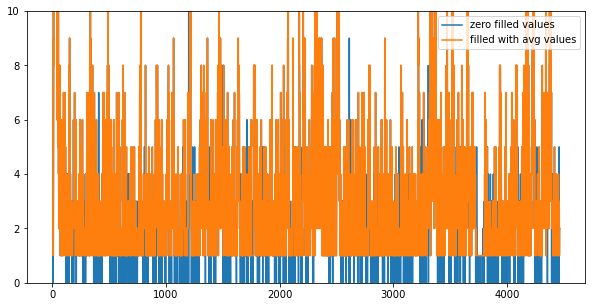

In [57]:
### plot smoothing  vs filling 
plt.figure(figsize=(10,5))
plt.plot(jan_2015_fill[13384:17848], label="zero filled values")
plt.plot(jan_2015_smoothed_values[13384:17848], label="filled with avg values")
plt.ylim(0,10)
plt.legend()
plt.show()

In [58]:
# why we choose, these methods and which method is used for which data?

# Ans: consider we have data of some month in 2015 jan 1st, 10 _ _ _ 20, i.e there are 10 pickups that are happened in 1st 
# 10st 10min intravel, 0 pickups happened in 2nd 10mins intravel, 0 pickups happened in 3rd 10min intravel 
# and 20 pickups happened in 4th 10min intravel.
# in fill_missing method we replace these values like 10, 0, 0, 20
# where as in smoothing method we replace these values as 6,6,6,6,6, if you can check the number of pickups 
# that are happened in the first 40min are same in both cases, but if you can observe that we looking at the future values 
# wheen you are using smoothing we are looking at the future number of pickups which might cause a data leakage.

# so we use smoothing for jan 2015th data since it acts as our training data
# and we use simple fill_misssing method for 2016th data.

In [59]:
# Jan-2015 data is smoothed, Jan,Feb & March 2016 data missing values are filled with zero
jan_2015_smooth = smoothening_using_avg(jan_2015_groupby['trip_distance'].values,jan_2015_unique)
jan_2016_smooth = fill_missing(jan_2016_groupby['trip_distance'].values,jan_2016_unique)
feb_2016_smooth = fill_missing(feb_2016_groupby['trip_distance'].values,feb_2016_unique)
mar_2016_smooth = fill_missing(mar_2016_groupby['trip_distance'].values,march_2016_unique)

In [60]:
# Making list of all the values of pickup data in every bin for a period of 3 months and storing them region-wise 
regions_cum = []

## example :
## a =[1,2,3]
## b = [4,5,6]
## a+b = [1,2,3,4,5,6]

## number of 10 min interval in the month of jan 2016 is 24*31*60/10 = 4464
## number of 10 min interval in the month of feb 2016 is 24*29*60/10 = 4176
## number of 10 min interval in the month of march 2016 is 24*31*60/10 = 4464
for i in range(20):
    regions_cum.append(jan_2016_smooth[4464*i:4464*(i+1)]+feb_2016_smooth[4176*i:4176*(i+1)]+mar_2016_smooth[4464*i:4464*(i+1)])

## Time series and Fourier Transforms

-------------- Month data for cluster  0 ------------------------------


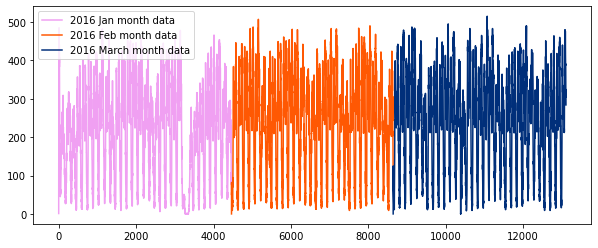

-------------- Month data for cluster  1 ------------------------------


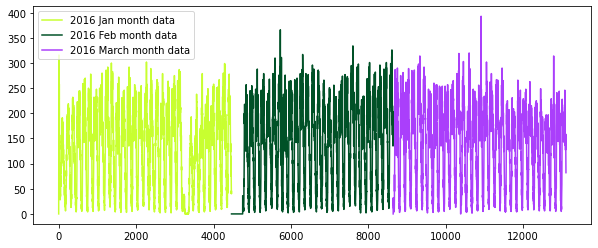

-------------- Month data for cluster  2 ------------------------------


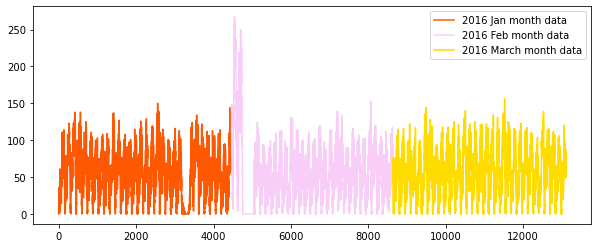

-------------- Month data for cluster  3 ------------------------------


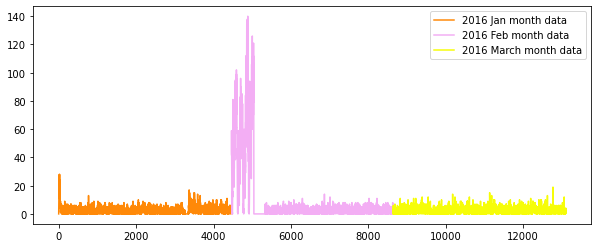

-------------- Month data for cluster  4 ------------------------------


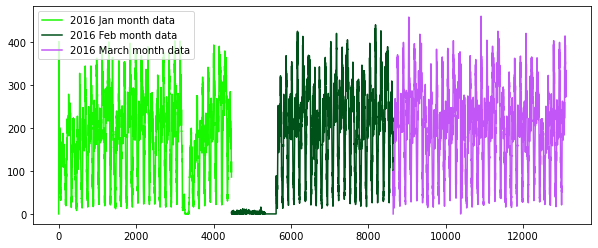

-------------- Month data for cluster  5 ------------------------------


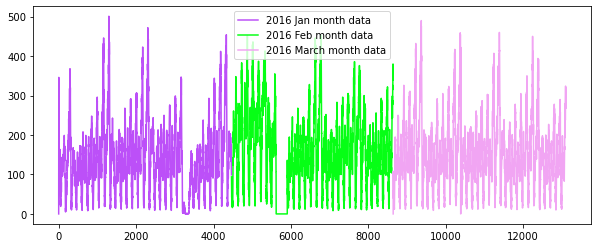

-------------- Month data for cluster  6 ------------------------------


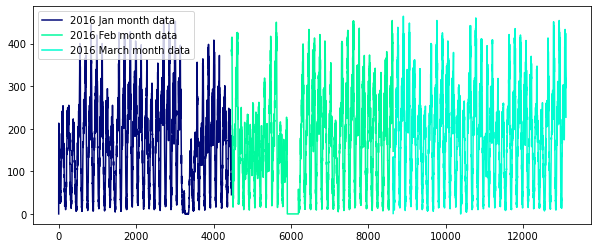

-------------- Month data for cluster  7 ------------------------------


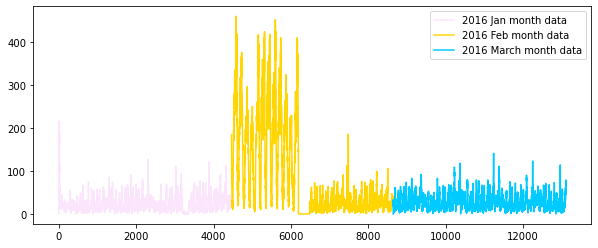

-------------- Month data for cluster  8 ------------------------------


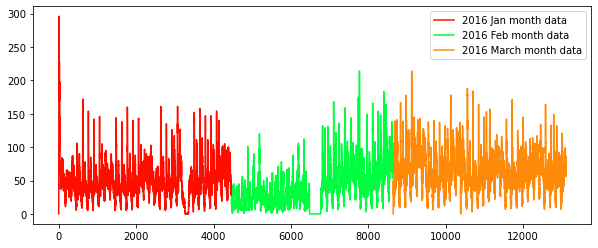

-------------- Month data for cluster  9 ------------------------------


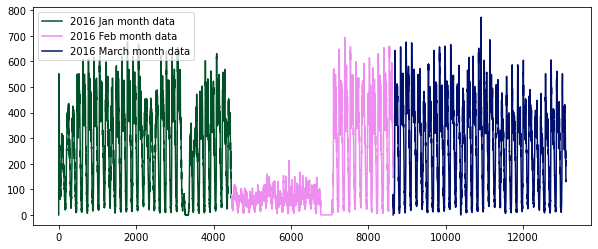

-------------- Month data for cluster  10 ------------------------------


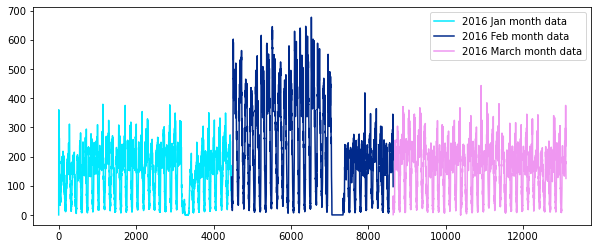

-------------- Month data for cluster  11 ------------------------------


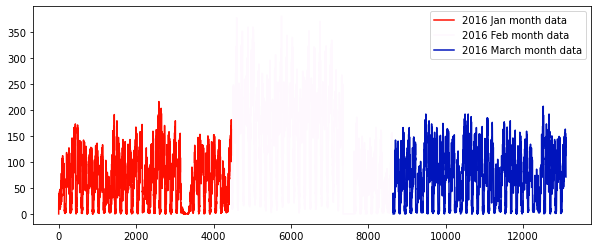

-------------- Month data for cluster  12 ------------------------------


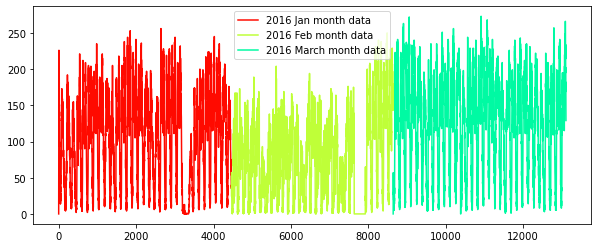

-------------- Month data for cluster  13 ------------------------------


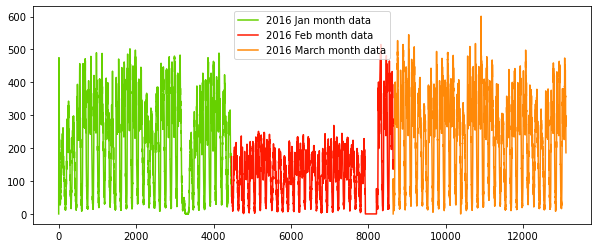

-------------- Month data for cluster  14 ------------------------------


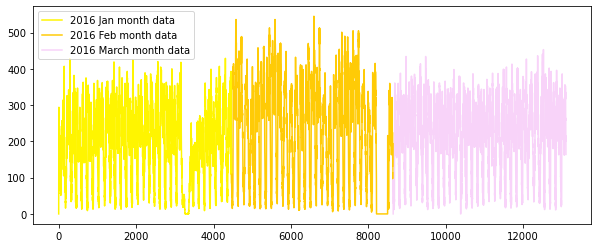

-------------- Month data for cluster  15 ------------------------------


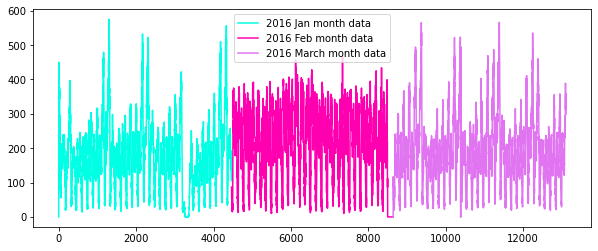

-------------- Month data for cluster  16 ------------------------------


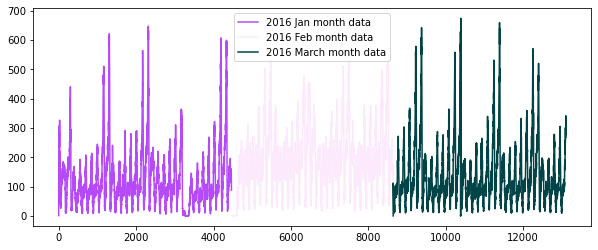

-------------- Month data for cluster  17 ------------------------------


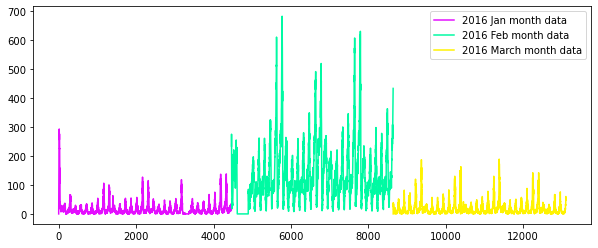

-------------- Month data for cluster  18 ------------------------------


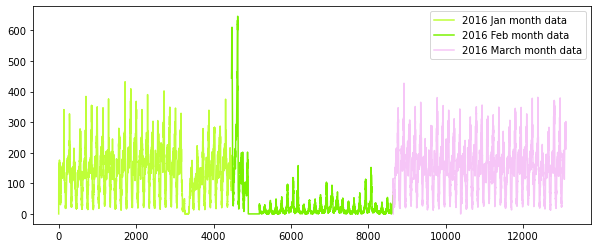

-------------- Month data for cluster  19 ------------------------------


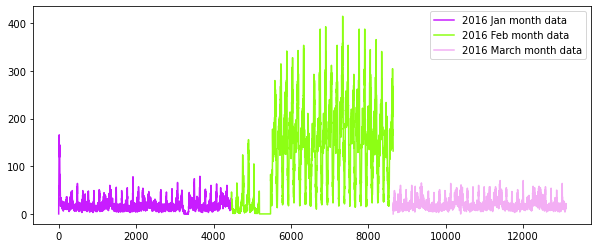

In [61]:
def unique_colors():
    """ There're better ways to generate unique colors"""
    return plt.cm.gist_ncar(np.random.random())

### let's generate unique colors 
first_x = list(range(0,4464))
second_x = list(range(4464,8640))
third_x = list(range(8640,13104))

## lets plot the monthly data for each cluster
for i in range(20):
    print('-------------- Month data for cluster ',i,'------------------------------')
    plt.figure(figsize=(10,4))
    plt.plot(first_x,regions_cum[i][:4464],color=unique_colors(),label='2016 Jan month data')
    plt.plot(second_x,regions_cum[i][4464:8640],color=unique_colors(),label='2016 Feb month data')
    plt.plot(third_x,regions_cum[i][8640:13104],color=unique_colors(),label='2016 March month data')
    plt.legend()
    plt.show()

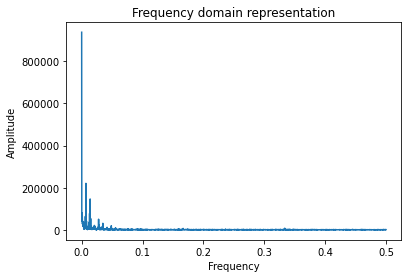

In [62]:
## Plot the amplitude and frequency of n/2 sample frequecies 
amplitude =  np.fft.fft(np.array(jan_2016_smooth)[0:4460])
frequency =  np.fft.fftfreq(4460,1)
n=len(frequency)
plt.figure()
plt.plot(frequency[:int(n/2)],np.abs(amplitude)[:int(n/2)])
plt.title('''Frequency domain representation''')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

* DC component : A regular wave without a DC component's mean equals zero. With a DC component the  mean of the sine wave is not equal to zero.That is an bias is added to the signal.
* x(t) = D + B.Sin(2.pi.f.t) 
* In the above equation D is  DC component added and we will not consider it's amplitude and frequency .Frequency and amplitude we will consider from the second peak


Text(0, 0.5, 'Amplitude')

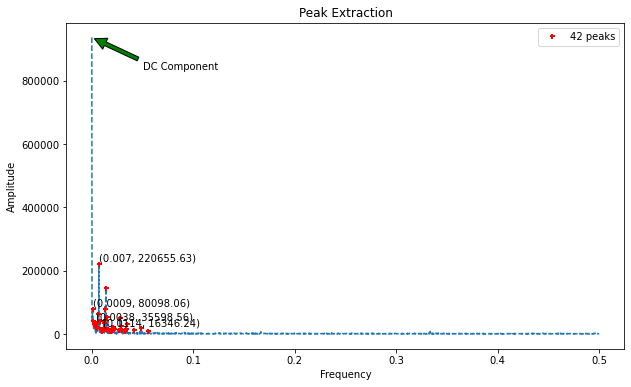

In [63]:
import peakutils
from peakutils.plot import plot as pp
def detect_peaks(y,thres):
    index = peakutils.indexes(np.abs(y),thres,min_dist=1,thres_abs=True)
    return index

thres = 10000
index = detect_peaks(amplitude[:int(n/2)],thres)
plt.figure(figsize=(10,6))
pp(frequency[:int(n/2)],np.abs(amplitude[:int(n/2)]),index)

plt.annotate('DC Component', xy = (frequency[:int(n/2)][0],np.abs(amplitude[:int(n/2)])[0]), 
                xytext =(frequency[:int(n/2)][0]+0.05,np.abs(amplitude[:int(n/2)])[0]-100000),  
                arrowprops = dict(facecolor ='green', 
                                  shrink = 0.05),) 
cnt=0
for i,j in zip(np.round(frequency[index][:20],4),np.round(np.abs(amplitude)[index][:20],2)):
    if cnt%5==0:
        plt.annotate((i,j),xy=(i,j),xytext=(i+0.000029,j+10000))
    cnt+=1
plt.title('Peak Extraction')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

* There is a total of 42 peaks above the threshold of 10000
* Annotated and checked some peak's frequency and amplitude

## Modelling: Baseline Models

Now we get into modelling in order to forecast the pickup densities for the months of Jan, Feb and March of 2016 for which we are using multiple models with two variations 
1. Using Ratios of the 2016 data to the 2015 data i.e $\begin{align} R_{t} = P^{2016}_{t} / P^{2015}_{t} \end{align}$
2. Using Previous known values of the 2016 data itself to predict the future values

In [64]:
## ratio feature tells us how much is one compared to the other!!!
## It will tell us how many pickups  happen in 2016 compqred to 2015
## Ratio feature:  rt =  pt(2016) / pt(2015)
## ratio between yearly patterns of two connsequtive years(2015,2016)
## 

ratio_jan = pd.DataFrame()
ratio_jan['prediction_year_pickups']  = jan_2016_smooth
ratio_jan['given_year_pickups']  = jan_2015_smooth
ratio_jan['Ratios'] = ratio_jan['prediction_year_pickups']*1.0 /  ratio_jan['given_year_pickups']*1.0

In [65]:
## look into the ratio feature
ratio_jan.head(5)

,prediction_year_pickups,given_year_pickups,Ratios
0,1,84,0.011905
1,168,84,2.000000
2,363,340,1.067647
3,370,432,0.856481
4,361,514,0.702335


In [66]:
print('Total time bins in the month of jan : ',len(ratio_jan))

Total time bins in the month of jan :  89280


In [67]:
print('Number of times more pickups happened in year 2015 than in year 2016: ',len(ratio_jan[ratio_jan['Ratios']<1]))

Number of times more pickups happened in year 2015 than in year 2016:  55595


In [68]:
print('Number of times more pickups happened in year 2016 than in year 2015: ',len(ratio_jan[ratio_jan['Ratios']>1]))

Number of times more pickups happened in year 2016 than in year 2015:  31148


In [69]:
print('Number of times same number of  pickups happened in year 2016 and 2015: ',len(ratio_jan[ratio_jan['Ratios']==1]))

Number of times same number of  pickups happened in year 2016 and 2015:  2537


### Simple Moving Averages
The First Model used is the Moving Averages Model which uses the previous n values in order to predict the next value <br> 

Using Ratio Values - $\begin{align}R_{t} = ( R_{t-1} + R_{t-2} + R_{t-3} .... R_{t-n} )/n \end{align}$

* MA values calculation:
$\begin{align}P_{t(2016)} = ( P_{t2015} * R_{t}) \end{align}$

In [70]:
def simple_moving_average_ratios(ratios):
    # here predicted ratio values for i is the average of the ratios of previous three values 
    # rt = (rt-1 + rt-2 + rt-3)/3
    # here predicted ma values is the product of rt and pickups at the given year
    # ma = rt * pt(given)
    #
    predicted_ratio = (ratios['Ratios'].values)[0]
    predicted_ma = []
    predicted_ratio_values=[]
    absolute_error = []
    squared_error = []
    window_size=3
    for i in range(0,4464*20):
        #-------first values for sma and ratio is going to be 0 -----------
        if i%4464==0:
            predicted_ma.append(0)
            predicted_ratio_values.append(0)
            absolute_error.append(0)
            squared_error.append(0)
            continue
            
        predicted_ratio_values.append(predicted_ratio)    
        sma_value = int((ratios['given_year_pickups'].values)[i])*predicted_ratio
        predicted_ma.append(sma_value)
        err =  abs(sma_value - ratios['prediction_year_pickups'][i])
        absolute_error.append(err)
        squared_error.append(math.pow(err,2))
        if i+1 >= window_size:
            predicted_ratio = sum((ratios['Ratios'].values)[(i+1)-window_size:i+1])/window_size
        else:
            predicted_ratio = sum((ratios['Ratios'].values)[0:i+1])/(i+1)
            
    ratios['SMA_ratios_predictions'] = predicted_ma
    ratios['SMA_ratios_absolute_error'] = absolute_error
    mape_error = (sum(absolute_error)/len(absolute_error)) / (sum(ratios['prediction_year_pickups'].values)/len(ratios['prediction_year_pickups'].values))
    mse_error =  sum(squared_error)/len(squared_error)
    return ratios,mape_error,mse_error
    

In [71]:
#here, if we calculate absolute percentage error by this formulae: 
# "error = (abs(int(predicted_ratio_values[i] * ratios["Given"].values[i]) - ratios["Prediction"].values[i])) / ratios["Prediction"].values[i]"
#then it will lead to divide by zero problem because many of the values in " ratios["Prediction"].values[i]" are zeros.
# so we used this method to calculate mean absolute percentage error: "mean of error/mean of real values"

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 3 is optimal for getting the best results using Moving Averages using previous Ratio values therefore we get $\begin{align}R_{t} = ( R_{t-1} + R_{t-2} + R_{t-3})/3 \end{align}$

Next we use the Moving averages of the 2016  values itself to predict the future value using $\begin{align}P_{t} = ( P_{t-1} + P_{t-2} + P_{t-3} .... P_{t-n} )/n \end{align}$

In [72]:
def simple_moving_average_pickups(ratios):
    predicted_value = (ratios['prediction_year_pickups'].values)[0]
    predicted_ma = []
    absolute_error = []
    squared_error = []
    window_size=1
    for i in range(0,4464*20):
        predicted_ma.append(predicted_value)
        err = abs(predicted_value - ratios['prediction_year_pickups'][i])
        absolute_error.append(err) 
        squared_error.append(math.pow(err,2))
        
        if i+1 >= window_size:
            predicted_value = int(sum(ratios['prediction_year_pickups'][(i+1)-window_size:i+1])/window_size)
        else:
            predicted_value = int(sum(ratios['prediction_year_pickups'][0:i+1])/(i+1))
            
    ratios['SMA_pickups_predictions'] = predicted_ma
    ratios['SMA_pickups_absolute_error'] = absolute_error
    mape_error = (sum(absolute_error)/len(absolute_error)) / (sum(ratios['prediction_year_pickups'].values)/len(ratios['prediction_year_pickups'].values))
    mse_error =  sum(squared_error)/len(squared_error)
    
    return ratios,mape_error,mse_error

In [73]:
x,y,c = simple_moving_average_pickups(ratio_jan)

In [74]:
y*100

10.870779108525399

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 1 is optimal for getting the best results using Moving Averages using previous 2016 values therefore we get $\begin{align}P_{t} = P_{t-1} \end{align}$

### Weighted Moving Averages
The Moving Avergaes Model used gave equal importance to all the values in the window used, but we know intuitively that the future is more likely to be similar to the latest values and less similar to the older values. Weighted Averages converts this analogy into a mathematical relationship giving the highest weight while computing the averages to the latest previous value and decreasing weights to the subsequent older ones<br>

Weighted Moving Averages using Ratio Values - $\begin{align}R_{t} = ( N*R_{t-1} + (N-1)*R_{t-2} + (N-2)*R_{t-3} .... 1*R_{t-n} )/(N*(N+1)/2) \end{align}$

In [75]:
def weighted_moving_average_ratios(ratios):
    predicted_ratio = (ratios['Ratios'].values)[0]
    absolute_error = []
    squared_error = []
    predicted_ratio_values = []
    predicted_values = []
    window_size,sum_coeff = 5,0
    for i in range(window_size,0,-1):
        sum_coeff += i
    for i in range(0,4464*20) :
        if i%4464 == 0:
            predicted_ratio_values.append(0)
            absolute_error.append(0)
            squared_error.append(0)
            predicted_values.append(0)
            continue
            
        value = ratios['given_year_pickups'][i]*predicted_ratio    
        predicted_values.append(value)
        predicted_ratio_values.append(predicted_ratio)
        err = abs(value - ratios['prediction_year_pickups'][i])
        absolute_error.append(err)
        squared_error.append(math.pow(err,2))
        if (i+1) >= window_size:
            sum_ = 0
            for j in range(window_size,0,-1):
                sum_ += j*(ratios['Ratios'][i-window_size+j])
            predicted_ratio = sum_/sum_coeff
        else:
            sum_ = 0
            for j in range(i,0,-1):
                sum_ += j*(ratios['Ratios'][j])
            predicted_ratio = sum_/sum_coeff
            
    ratios['WMA_ratios_predictions'] = predicted_values
    ratios['WMA_ratios_absolute_error'] = absolute_error
    
    mape_error = (sum(absolute_error)/len(absolute_error)) / (sum(ratios['prediction_year_pickups'].values)/len(ratios['prediction_year_pickups'].values))
    mse_error =  sum(squared_error)/len(squared_error)
    
    return ratios,mape_error,mse_error

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 5 is optimal for getting the best results using Weighted Moving Averages using previous Ratio values therefore we get $\begin{align} R_{t} = ( 5*R_{t-1} + 4*R_{t-2} + 3*R_{t-3} + 2*R_{t-4} + R_{t-5} )/15 \end{align}$

Weighted Moving Averages using Previous 2016 Values - $\begin{align}P_{t} = ( N*P_{t-1} + (N-1)*P_{t-2} + (N-2)*P_{t-3} .... 1*P_{t-n} )/(N*(N+1)/2) \end{align}$

In [76]:
def weighted_moving_average_pickups(ratios):
    predicted_value = (ratios['prediction_year_pickups'].values)[0]
    absolute_error = []
    squared_error = []
    predicted_values = []
    window_size,sum_coeff = 2,0
    for i in range(window_size,0,-1):
        sum_coeff += i
    for i in range(0,4464*20) :
        if i%4464 == 0:
            absolute_error.append(0)
            squared_error.append(0)
            predicted_values.append(0) 
            continue
            
        predicted_values.append(predicted_value)
        err = abs(predicted_value - ratios['prediction_year_pickups'][i])
        absolute_error.append(err)
        squared_error.append(math.pow(err,2))
        if (i+1) >= window_size:
            sum_ = 0
            for j in range(window_size,0,-1):
                sum_ += j*(ratios['prediction_year_pickups'][i-window_size+j])
            predicted_value = sum_/sum_coeff
        else:
            sum_ = 0
            for j in range(i,0,-1):
                sum_ += j*(ratios['prediction_year_pickups'][j])
            predicted_value = sum_/sum_coeff
            
    ratios['WMA_ratios_predictions'] = predicted_values
    ratios['WMA_ratios_absolute_error'] = absolute_error
    
    mape_error = (sum(absolute_error)/len(absolute_error)) / (sum(ratios['prediction_year_pickups'].values)/len(ratios['prediction_year_pickups'].values))
    mse_error =  sum(squared_error)/len(squared_error)
    
    return ratios,mape_error,mse_error

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 2 is optimal for getting the best results using Weighted Moving Averages using previous 2016 values therefore we get $\begin{align} P_{t} = ( 2*P_{t-1} + P_{t-2} )/3 \end{align}$

### Exponential  Weighted Moving Averages
 https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average
Through weighted averaged we have satisfied the analogy of giving higher weights to the latest value and decreasing weights to the subsequent ones but we still do not know which is the correct weighting scheme as there are infinetly many possibilities in which we can assign weights in a non-increasing order and tune the the hyperparameter window-size. To simplify this process we use Exponential Moving Averages which is a more logical way towards assigning weights and at the same time also using an optimal window-size.

In exponential moving averages we use a single hyperparameter alpha $\begin{align}(\alpha)\end{align}$ which is a value between 0 & 1 and based on the value of the hyperparameter alpha the weights and the window sizes are configured.<br>
For eg. If $\begin{align}\alpha=0.9\end{align}$ then the number of days on which the value of the current iteration is based is~$\begin{align}1/(1-\alpha)=10\end{align}$ i.e. we consider values 10 days prior before we predict the value for the current iteration. Also the weights are assigned using $\begin{align}2/(N+1)=0.18\end{align}$ ,where N = number of prior values being considered, hence from this it is implied that the first or latest value is assigned a weight of 0.18 which keeps exponentially decreasing for the subsequent values.

$\begin{align}R^{'}_{t} = \alpha*R_{t-1} + (1-\alpha)*R^{'}_{t-1}  \end{align}$

In [77]:
def exp_moving_average_ratios(ratios):
    predicted_ratio=(ratios['Ratios'].values)[0]
    alpha=0.6
    absolute_error,squared_error=[],[]
    predicted_values=[]
    predicted_ratio_values=[]
    for i in range(0,4464*20):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            absolute_error.append(0)
            squared_error.append(0)
            continue
            
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['given_year_pickups'].values)[i])*predicted_ratio))
        err = abs(((ratios['given_year_pickups'].values[i])*predicted_ratio)-(ratios['prediction_year_pickups'].values)[i])
        absolute_error.append(err)
        squared_error.append(err**2)
        predicted_ratio = (alpha*predicted_ratio) + (1-alpha)*((ratios['Ratios'].values)[i])
    
    ratios['EMA_ratios_predictions'] = predicted_values
    ratios['WMA_ratios_absolute_error'] = absolute_error
    mape_err = (sum(absolute_error)/len(absolute_error))/(sum(ratios['prediction_year_pickups'].values)/len(ratios['prediction_year_pickups'].values))
    mse_err = sum(squared_error)/len(squared_error)
    return ratios,mape_err,mse_err

$\begin{align}P^{'}_{t} = \alpha*P_{t-1} + (1-\alpha)*P^{'}_{t-1}  \end{align}$

In [78]:
def exp_moving_average_pickups(ratios):
    predicted_value=(ratios['prediction_year_pickups'].values)[0]
    alpha=0.3
    absolute_error,squared_error=[],[]
    predicted_values=[]
    for i in range(0,4464*20):
        if i%4464==0:
            predicted_values.append(0)
            absolute_error.append(0)
            squared_error.append(0)
            continue
        predicted_values.append(predicted_value)
        err = abs((predicted_value)-(ratios['prediction_year_pickups'].values)[i])
        absolute_error.append(err)
        squared_error.append(err**2)
        predicted_value = int((alpha*predicted_value) + (1-alpha)*((ratios['prediction_year_pickups'].values)[i]))
    
    ratios['EMA_ratios_predictions'] = predicted_values
    ratios['WMA_ratios_absolute_error'] = absolute_error
    mape_err = (sum(absolute_error)/len(absolute_error))/(sum(ratios['prediction_year_pickups'].values)/len(ratios['prediction_year_pickups'].values))
    mse_err = sum(squared_error)/len(squared_error)
    return ratios,mape_err,mse_err

In [79]:
mean_err=[0]*10
median_err=[0]*10
r1,mean_err[0],median_err[0] = simple_moving_average_ratios(ratio_jan)
r2,mean_err[1],median_err[1] = simple_moving_average_pickups(ratio_jan)
r3,mean_err[2],median_err[2] = weighted_moving_average_ratios(ratio_jan)
r4,mean_err[3],median_err[3] = weighted_moving_average_pickups(ratio_jan)
r5,mean_err[4],median_err[4] = exp_moving_average_ratios(ratio_jan)
r6,mean_err[5],median_err[5] = exp_moving_average_pickups(ratio_jan)

## Comparison between baseline models
We have chosen our error metric for comparison between models as <b>MAPE (Mean Absolute Percentage Error)</b> so that we can know that on an average how good is our model with predictions and <b>MSE (Mean Squared Error)</b> is also used so that we have a clearer understanding as to how well our forecasting model performs with outliers so that we make sure that there is not much of a error margin between our prediction and the actual value

In [80]:
err_table = pd.DataFrame(columns=['Model','MAPE%','MSE'])
a1 = ['Simple Moving Average using ratios',round(mean_err[0]*100,2),median_err[0]]
a2 = ['Simple Moving Average using 2016 predictions',round(mean_err[1]*100,2),median_err[1]]
a3 = ['Weighted Moving Average using ratios',round(mean_err[2]*100,2),median_err[2]]
a4 = ['Weighted Moving Average using 2016 predictions',round(mean_err[3]*100,2),median_err[3]]
a5 = ['Exponential Moving Average using ratios',round(mean_err[4]*100,2),median_err[4]]
a6 = ['Exponential Moving Average using 2016 predictions',round(mean_err[5]*100,2),median_err[5]]
err_table.append(pd.DataFrame([a1,a2,a3,a4,a5,a6],columns=['Model','MAPE%','MSE']))

,Model,MAPE%,MSE
0,Simple Moving Average using ratios,13.97,834.442528
1,Simple Moving Average using 2016 predictions,10.87,381.956933
2,Weighted Moving Average using ratios,13.80,834.044410
3,Weighted Moving Average using 2016 predictions,10.60,372.088764
4,Exponential Moving Average using ratios,13.75,846.339660
5,Exponential Moving Average using 2016 predictions,10.60,370.280253


<b>Plese Note:-</b> The above comparisons are made using Jan 2015 and Jan 2016 only

From the above matrix it is inferred that the best forecasting model for our prediction would be:-
$\begin{align}P^{'}_{t} = \alpha*P_{t-1} + (1-\alpha)*P^{'}_{t-1}  \end{align}$ i.e Exponential Moving Averages using 2016 Values

## Regression Models

### Train-Test Split
Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data and split it such that for every region we have 70% data in train and 30% in test, ordered date-wise for every region

In [81]:
# first we are creating some initial features
# feature 1 : latitude , feature 2 : longitude, feature 3: day of the week
# longitude : it is the cluster longitude value 
# We have jan_2016 data which has sublists of size 20  where each list corresponds to a clusternumber 
# and element of each cluster  is a pickup values at 10-minute intervals
# every cluster has 4464 values which refers to number of pickups at every 10 mins in the month ofjan.
## jan_2016  = [[81,23,45,33,56,.....4464 values],..........20 lists]
## here 81,23,45 are pickup values at timestamp 1 ,2,3,4...
## region_cum is a list of size 20 which contains sublists each having jan_2016-march2016 pickup values 
## Total number of values for region_cum would be [[4464+4176+4464],[4464+4176+4464],[4464+4176+4464]...20 lists]
## where 4464 is the total number of 10 minute interval in the month of jan,march and 4176 is the total number of 
## 10 minute interval in the month of feb

# we  are going to consider values from the 5th timestamp as we need first 5 timepstamp to predict hence we will omit it 
# in our features

## building feature 1 : latitude
# latitude : it is the cluster latitude value , we will repeat this value till 13099 (4464+4176+4464  - 5) for each cluster
lat = []

## building feature 2 : longitude
# longitude : it is the cluster longitude value , we will repeat this value till 13099 (4464+4176+4464  - 5) for each cluster
lon = []

## building feature 3 : week_day
# weekday : it is the day of the week coded from 0-6(sun-sat) , we will repeat this value till 13099 (4464+4176+4464  - 5) for each cluster
week_day = []

## output will contain the pickup values 13099 for each cluster  

out=[]

# featue4 : tsne_feat
# its an numbpy arrahttp://localhost:8888/notebooks/Documents/appleidai/taxi_demand/test.ipynb#y, of shape (523960, 5)
# each row corresponds to an entry in out data
# for the first row we will have [f0,f1,f2,f3,f4] fi=number of pickups happened in i+1th 10min intravel(bin)
# the second row will have [f1,f2,f3,f4,f5]
# the third row will have [f2,f3,f4,f5,f6]
# and so on...

number_of_timestamps = 5 
tsne_feat = [0]*5

for i in range(20):
    lat.append([kmeans.cluster_centers_[i][0]]*13099)
    lon.append([kmeans.cluster_centers_[i][1]]*13099)
    ## jan 1 2016 is a friday hence we start with the code 5
    week_day.append([int(((int(k/144))%7+5)%7) for k in range(5,4464+4176+4464)])
    tsne_feat = np.vstack((tsne_feat,[regions_cum[i][r:r+number_of_timestamps] for r in range(0,len(regions_cum[i])- number_of_timestamps)]))
    out.append(regions_cum[i][5:])

tsne_feat = tsne_feat[1:]

In [82]:
## sanity check : if all the features is of size 
len(lat[0])*len(lat) == tsne_feat.shape[0] == len(week_day)*len(week_day[0]) == 20*13099 == len(out)*len(out[0])

True

###  Adding exponential moving average 
* from the baseline models we said the exponential weighted moving avarage gives us the best error
* we will try to add the same exponential weighted moving avarage at t as a feature to our data
* exponential weighted moving avarage => p'(t) = alpha*p'(t-1) + (1-alpha)*P(t-1) 
##### 1. cluster center lattitude
##### 2. cluster center longitude
##### 3. day of the week 
##### 4. f_t_1: number of pickups that are happened previous t-1th 10min intravel
##### 5. f_t_2: number of pickups that are happened previous t-2th 10min intravel
##### 6. f_t_3: number of pickups that are happened previous t-3th 10min intravel
##### 7. f_t_4: number of pickups that are happened previous t-4th 10min intravel
##### 8. f_t_5: number of pickups that are happened previous t-5th 10min intravel

In [83]:
alpha = 0.3
predicted_values = []
predict_list = []
tsne_flat_exp_avg = []
for clstr in range(0,20):
    for i in range(0,13104):
        if i == 0:
            predicted_value = regions_cum[clstr][0]
            predicted_values.append(0)
            continue
        predicted_values.append(predicted_value)
        predicted_value = int((alpha*predicted_value) + (1-alpha)*(regions_cum[clstr][i]))
    predict_list.append(predicted_values[5:])
    predicted_values=[]

In [84]:
# train, test split : 70% 30% split
# Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data 
# and split it such that for every region we have 70% data in train and 30% in test,
# ordered date-wise for every region
print("size of train data :", int((13099*0.7)))
print("size of test data :", int((13099*0.3)))

size of train data : 9169
size of test data : 3929


In [85]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
train_features = [tsne_feat[i*13099:(13099*i+9169)] for i in range(0,20)]
# temp = [0]*(12955 - 9068)
test_features = [tsne_feat[(13099*(i))+9169:13099*(i+1)] for i in range(0,20)]

In [86]:
print("Number of data clusters",len(train_features), "Number of data points in trian data", len(train_features[0]), "Each data point contains", len(train_features[0][0]),"features")
print("Number of data clusters",len(train_features), "Number of data points in test data", len(test_features[0]), "Each data point contains", len(test_features[0][0]),"features")

Number of data clusters 20 Number of data points in trian data 9169 Each data point contains 5 features
Number of data clusters 20 Number of data points in test data 3930 Each data point contains 5 features


In [87]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
train_flat_lat = [i[:9169] for i in lat]
train_flat_lon = [i[:9169] for i in lon]
train_flat_weekday = [i[:9169] for i in week_day]
train_flat_output = [i[:9169] for i in out]
train_flat_exp_avg = [i[:9169] for i in predict_list]

In [88]:
# extracting the rest of the timestamp values i.e 30% of 12956 (total timestamps) for our test data
test_flat_lat = [i[9169:] for i in lat]
test_flat_lon = [i[9169:] for i in lon]
test_flat_weekday = [i[9169:] for i in week_day]
test_flat_output = [i[9169:] for i in out]
test_flat_exp_avg = [i[9169:] for i in predict_list]

In [89]:
# the above contains values in the form of list of lists (i.e. list of values of each region), here we make all of them in one list
train_new_features = []
for i in range(0,20):
    train_new_features.extend(train_features[i])
test_new_features = []
for i in range(0,20):
    test_new_features.extend(test_features[i])

In [90]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

train_lat = sum(train_flat_lat, [])
train_lon = sum(train_flat_lon, [])
train_weekday = sum(train_flat_weekday, [])
train_output = sum(train_flat_output, [])
train_exp_avg = sum(train_flat_exp_avg,[])

In [91]:
len(test_flat_exp_avg[0])

3930

In [92]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

test_lat = sum(test_flat_lat, [])
test_lon = sum(test_flat_lon, [])
test_weekday = sum(test_flat_weekday, [])
test_output = sum(test_flat_output, [])
test_exp_avg = sum(test_flat_exp_avg,[])

In [93]:
# Preparing the data frame for our train data
columns = ['ft_5','ft_4','ft_3','ft_2','ft_1']
df_train = pd.DataFrame(data=train_new_features, columns=columns) 
df_train['lat'] = train_lat
df_train['lon'] = train_lon
df_train['weekday'] = train_weekday
df_train['exp_avg'] = train_exp_avg

print(df_train.shape)

(183380, 9)


In [94]:
# Preparing the data frame for our train data
df_test = pd.DataFrame(data=test_new_features, columns=columns) 
df_test['lat'] = test_lat
df_test['lon'] = test_lon
df_test['weekday'] = test_weekday
df_test['exp_avg'] = test_exp_avg
print(df_test.shape)

(78600, 9)


In [95]:
df_train.head(5)

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,exp_avg
0,1,168,363,370,361,40.746118,-73.979062,5,356
1,168,363,370,361,413,40.746118,-73.979062,5,395
2,363,370,361,413,434,40.746118,-73.979062,5,422
3,370,361,413,434,459,40.746118,-73.979062,5,447
4,361,413,434,459,445,40.746118,-73.979062,5,445


## Adding fourier features

In [96]:
## we will add top 5 frequency and amplitude values 
## for every region take top 5 frequncy and amplitude 
## there are 20 clusters 
final = []
for i in range(0,20):
    jan_data = regions_cum[i][0:4464]
    feb_data = regions_cum[i][4464:4464+4176]
    mar_data = regions_cum[i][4464+4176:4464+4176+4464]
    
    ## creating fourier transforms
    jan_amp = np.fft.fft(jan_data,4464)
    feb_amp = np.fft.fft(feb_data,4176)
    mar_amp = np.fft.fft(mar_data,4464)
    
    jan_freq = np.fft.fftfreq(4464,1)
    feb_freq = np.fft.fftfreq(4176,1)
    mar_freq = np.fft.fftfreq(4464,1)
    
    jan_fftamp =  sorted(jan_amp,reverse=True)[:5]
    feb_fftamp =  sorted(feb_amp,reverse=True)[:5]
    mar_fftamp =  sorted(mar_amp,reverse=True)[:5]
    
    jan_fftfreq = sorted(jan_freq,reverse=True)[:5]
    feb_fftfreq = sorted(feb_freq,reverse=True)[:5]
    mar_fftfreq = sorted(mar_freq,reverse=True)[:5]

    
    m,n,o = [0]*5,[0]*5,[0]*5
    a,b,c = [0]*5,[0]*5,[0]*5
    
    
    for i in range(5):
        m[i] = [jan_fftfreq[i]] * 4464  
        n[i] = [feb_fftfreq[i]] * 4176
        o[i] = [mar_fftfreq[i]] * 4464
        
        a[i] = [jan_fftamp[i]] * 4464
        b[i] = [feb_fftamp[i]] * 4176
        c[i] = [mar_fftamp[i]] * 4464
   
        
    jan_fftamp = np.array(a).T
    feb_fftamp = np.array(b).T
    mar_fftamp = np.array(c).T
    
    jan_fftfreq = np.array(m).T
    feb_fftfreq = np.array(n).T
    mar_fftfreq = np.array(o).T

    
    jan = np.hstack((jan_fftamp,jan_fftfreq)) 
    feb =  np.hstack((feb_fftamp,feb_fftfreq))
    mar = np.hstack((mar_fftamp,mar_fftfreq))
    
    all_ = np.vstack((jan , feb))
    all_ = np.vstack((all_ , mar))
    
    dt = pd.DataFrame(data = all_ ,columns=['A1','A2','A3','A4','A5','F1','F2','F3','F4','F5'])
    dt = dt.astype(np.float)
    final.append(dt)

In [97]:
## lets concat the fourier features
fourier_feat = final[0]
for i in range(1,len(final)):
    fourier_feat = pd.concat([fourier_feat,final[i]],ignore_index=True)
print("Shape of fourier transformed features for all points - ", fourier_feat.shape)
fourier_feat = fourier_feat.astype(np.float)
fourier_feat.tail(3)    

Shape of fourier transformed features for all points -  (262080, 10)


,A1,A2,A3,A4,A5,F1,F2,F3,F4,F5
262077,91289.0,9746.506136,9746.506136,6436.649191,6436.649191,0.499776,0.499552,0.499328,0.499104,0.49888
262078,91289.0,9746.506136,9746.506136,6436.649191,6436.649191,0.499776,0.499552,0.499328,0.499104,0.49888
262079,91289.0,9746.506136,9746.506136,6436.649191,6436.649191,0.499776,0.499552,0.499328,0.499104,0.49888


## Merging the fourier features


In [98]:
fourier_feat_train = pd.DataFrame(columns=['A1','A2','A3','A4','A5','F1','F2','F3','F4','F5'])
fourier_feat_test = pd.DataFrame(columns=['A1','A2','A3','A4','A5','F1','F2','F3','F4','F5'])

for i in range(20):
    fourier_feat_train = fourier_feat_train.append(fourier_feat[i*13099 : 13099*i + 9169])

fourier_feat_train.reset_index(inplace=True)   

for i in range(20):
    fourier_feat_test = fourier_feat_test.append(fourier_feat[13099*i + 9169 : 13099*(i+1)])

fourier_feat_test.reset_index(inplace=True)   

In [99]:
df_train = pd.concat([df_train,fourier_feat_train],axis=1)

In [100]:
df_train.drop(['index'],axis=1,inplace=True)

In [101]:
df_train.head(5)

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,exp_avg,A1,A2,A3,A4,A5,F1,F2,F3,F4,F5
0,1,168,363,370,361,40.746118,-73.979062,5,356,936982.0,64630.623606,64630.623606,60044.740121,60044.740121,0.499776,0.499552,0.499328,0.499104,0.49888
1,168,363,370,361,413,40.746118,-73.979062,5,395,936982.0,64630.623606,64630.623606,60044.740121,60044.740121,0.499776,0.499552,0.499328,0.499104,0.49888
2,363,370,361,413,434,40.746118,-73.979062,5,422,936982.0,64630.623606,64630.623606,60044.740121,60044.740121,0.499776,0.499552,0.499328,0.499104,0.49888
3,370,361,413,434,459,40.746118,-73.979062,5,447,936982.0,64630.623606,64630.623606,60044.740121,60044.740121,0.499776,0.499552,0.499328,0.499104,0.49888
4,361,413,434,459,445,40.746118,-73.979062,5,445,936982.0,64630.623606,64630.623606,60044.740121,60044.740121,0.499776,0.499552,0.499328,0.499104,0.49888


In [102]:
df_test = pd.concat([df_test,fourier_feat_test],axis=1)
df_test.drop(['index'],axis=1,inplace=True)

In [103]:
df_test.head(5)

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,exp_avg,A1,A2,A3,A4,A5,F1,F2,F3,F4,F5
0,250,223,217,229,253,40.746118,-73.979062,5,244,1069666.0,32438.27824,32438.27824,26396.260518,26396.260518,0.499776,0.499552,0.499328,0.499104,0.49888
1,223,217,229,253,271,40.746118,-73.979062,5,262,1069666.0,32438.27824,32438.27824,26396.260518,26396.260518,0.499776,0.499552,0.499328,0.499104,0.49888
2,217,229,253,271,317,40.746118,-73.979062,5,300,1069666.0,32438.27824,32438.27824,26396.260518,26396.260518,0.499776,0.499552,0.499328,0.499104,0.49888
3,229,253,271,317,343,40.746118,-73.979062,5,330,1069666.0,32438.27824,32438.27824,26396.260518,26396.260518,0.499776,0.499552,0.499328,0.499104,0.49888
4,253,271,317,343,351,40.746118,-73.979062,5,344,1069666.0,32438.27824,32438.27824,26396.260518,26396.260518,0.499776,0.499552,0.499328,0.499104,0.49888


### Holts Winter Triple exponential smoothing :

References - https://grisha.org/blog/2016/02/17/triple-exponential-smoothing-forecasting-part-iii/

In [104]:
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

In [105]:

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [141]:
def triple_exponential_smoothing(series,slen, alpha, beta, gamma, n_preds):
    result = []
    # n_preds is the number of predictions to be made
    abs_err = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            abs_err.append(0)
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            final_val = smooth+trend+seasonals[i%slen]
            abs_err.append(abs(series[i] - final_val))
            result.append(final_val)
    
    return result,abs_err

### Hyperparameter Tuning Alpha,Beta and Gamma values

In [152]:
season_len = 24
predict_list_2 = []
mape = []
## lets manually fine tune alpha beta and gamma 
alpha = [0.25,0.2,0.15,0.1]
beta = [0.1,0.15,0.20,0.25]
gamma = [0.1,0.15,0.20,0.08,0.05]
fine_tune = []
regions_sum = []
abs_sum = []
length = len(regions_cum[0]) * 20
for a in alpha :
    for b in beta:
        for g in gamma:
            for r in range(0,20):
                predict_values_2,abs_val = triple_exponential_smoothing(regions_cum[r][0:13104], season_len, a, b, g, 0)
                predict_list_2.append(predict_values_2[5:])
                regions_sum.append(sum(regions_cum[r][0:13104]))
                abs_sum.append(sum(abs_val))
            mape_err = (sum(abs_sum)/length)/(sum(regions_sum)/length)
            print('Mape% with alpha : {} ,beta:{}, gamma:{} is '.format(a,b,g),mape_err*100)
            fine_tune.append((a,b,g,mape_err*100))     

Mape% with alpha : 0.25 ,beta:0.1, gamma:0.1 is  9.942204773276476
Mape% with alpha : 0.25 ,beta:0.1, gamma:0.15 is  9.735437880893153
Mape% with alpha : 0.25 ,beta:0.1, gamma:0.2 is  9.525150005361171
Mape% with alpha : 0.25 ,beta:0.1, gamma:0.08 is  9.671787529522046
Mape% with alpha : 0.25 ,beta:0.1, gamma:0.05 is  9.812423702725827
Mape% with alpha : 0.25 ,beta:0.15, gamma:0.1 is  9.780286682901682
Mape% with alpha : 0.25 ,beta:0.15, gamma:0.15 is  9.717639567671236
Mape% with alpha : 0.25 ,beta:0.15, gamma:0.2 is  9.640733292547917
Mape% with alpha : 0.25 ,beta:0.15, gamma:0.08 is  9.653398474042957
Mape% with alpha : 0.25 ,beta:0.15, gamma:0.05 is  9.684941926351097
Mape% with alpha : 0.25 ,beta:0.2, gamma:0.1 is  9.685905129856026
Mape% with alpha : 0.25 ,beta:0.2, gamma:0.15 is  9.711086043550349
Mape% with alpha : 0.25 ,beta:0.2, gamma:0.2 is  9.975406038670775
Mape% with alpha : 0.25 ,beta:0.2, gamma:0.08 is  9.962528393093713
Mape% with alpha : 0.25 ,beta:0.2, gamma:0.05 is 

In [204]:
## lets get the parameters which gives minimum mape value
from operator import itemgetter
best_params = fine_tune[np.argmin(list(map(itemgetter(3),fine_tune)))]
print('For triple exponential smoothening the minimum mape value was found to be ',best_params[3])
print('The best alpha,beta and gamma parameters for triple exponential smoothening having minimum MAPE value are',best_params[:3])

For triple exponential smoothening the minimum mape value was found to be  9.525150005361171
The best alpha,beta and gamma parameters for triple exponential smoothening having minimum MAPE value are (0.25, 0.1, 0.2)


In [206]:
## triple exponent smoothing with optimal parameters
alpha = 0.25
beta = 0.1
gamma = 0.2
season_len = 24
predict_list_2 = []
predict_values_2 = []
for r in range(20):
    predict_values_2,abs_val = triple_exponential_smoothing(regions_cum[r][0:13104], season_len, 0.25, 0.1, 0.2, 0)
    predict_list_2.append(predict_values_2[5:])


In [215]:
train_flat_exp_avg_2 = [i[:9169] for i in predict_list_2]
test_flat_exp_avg_2 = [i[9169:] for i in predict_list_2]

In [216]:
train_exp_avg_2 = sum(train_flat_exp_avg_2,[])
test_exp_avg_2 =  sum(test_flat_exp_avg_2,[])

In [217]:
df_train['exp_avg_2'] = train_exp_avg_2 
df_test['exp_avg_2'] = test_exp_avg_2

In [222]:
df_train.head(4)

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,exp_avg,A1,A2,A3,A4,A5,F1,F2,F3,F4,F5,exp_avg_2
0,1,168,363,370,361,40.746118,-73.979062,5,356,936982.0,64630.623606,64630.623606,60044.740121,60044.740121,0.499776,0.499552,0.499328,0.499104,0.49888,325.786156
1,168,363,370,361,413,40.746118,-73.979062,5,395,936982.0,64630.623606,64630.623606,60044.740121,60044.740121,0.499776,0.499552,0.499328,0.499104,0.49888,368.221926
2,363,370,361,413,434,40.746118,-73.979062,5,422,936982.0,64630.623606,64630.623606,60044.740121,60044.740121,0.499776,0.499552,0.499328,0.499104,0.49888,417.987207
3,370,361,413,434,459,40.746118,-73.979062,5,447,936982.0,64630.623606,64630.623606,60044.740121,60044.740121,0.499776,0.499552,0.499328,0.499104,0.49888,441.461259


### Using Linear Regression  (hyperparameter tuning :GridSearchCV)

In [243]:
# find more about LinearRegression function here http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# -------------------------
# default paramters
# sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

# some of methods of LinearRegression()
# fit(X, y[, sample_weight])	Fit linear model.
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict using the linear model
# score(X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
# set_params(**params)	Set the parameters of this estimator.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1-2-copy-8/
# -----------------------

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
lr = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False],'copy_X':[True,False]}
g_s = GridSearchCV(lr,params,cv=3,n_jobs=-1)
g_s.fit(df_train,train_output)
print(g_s.best_estimator_)

LinearRegression(fit_intercept=False, normalize=True)


In [244]:
lr = LinearRegression(fit_intercept=False,normalize=True)
lr.fit(df_train,train_output)


LinearRegression(fit_intercept=False, normalize=True)

In [245]:
train_pred = lr.predict(df_train)
lr_train_pred = [round(value) for value in train_pred]
test_pred = lr.predict(df_test)
lr_test_pred = [round(value) for value in test_pred]

### Using Random Forest (hyperparameter tuning :RandomSearchCV)

In [253]:
# Training a hyper-parameter tuned random forest regressor on our train data
# find more about LinearRegression function here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# -------------------------
# default paramters
# sklearn.ensemble.RandomForestRegressor(n_estimators=10, criterion=’mse’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)

# some of methods of RandomForestRegressor()
# apply(X)	Apply trees in the forest to X, return leaf indices.
# decision_path(X)	Return the decision path in the forest
# fit(X, y[, sample_weight])	Build a forest of trees from the training set (X, y).
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict regression target for X.
# score(X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())
rf =  RandomForestRegressor(n_jobs=-1)
params = dict()
params['min_samples_leaf'] =  [1, 2, 4]
params['min_samples_split'] = [2, 5, 10]
params['n_estimators'] = [int(x) for x in np.linspace(start = 40, stop = 1000, num = 10)]
params['max_features'] = ['auto','sqrt']
rs_rf = RandomizedSearchCV(rf,params,cv=3,scoring='neg_mean_absolute_error',verbose=3)
rs_rf.fit(df_train,train_output)
print(rs_rf.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=360, min_samples_split=5, min_samples_leaf=4, max_features=sqrt 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=360, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, score=-8.693, total=  26.5s
[CV] n_estimators=360, min_samples_split=5, min_samples_leaf=4, max_features=sqrt 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.4s remaining:    0.0s


[CV]  n_estimators=360, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, score=-9.958, total=  24.8s
[CV] n_estimators=360, min_samples_split=5, min_samples_leaf=4, max_features=sqrt 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   51.2s remaining:    0.0s


[CV]  n_estimators=360, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, score=-9.783, total=  25.3s
[CV] n_estimators=680, min_samples_split=10, min_samples_leaf=4, max_features=auto 
[CV]  n_estimators=680, min_samples_split=10, min_samples_leaf=4, max_features=auto, score=-8.505, total= 2.9min
[CV] n_estimators=680, min_samples_split=10, min_samples_leaf=4, max_features=auto 
[CV]  n_estimators=680, min_samples_split=10, min_samples_leaf=4, max_features=auto, score=-9.783, total= 2.9min
[CV] n_estimators=680, min_samples_split=10, min_samples_leaf=4, max_features=auto 
[CV]  n_estimators=680, min_samples_split=10, min_samples_leaf=4, max_features=auto, score=-9.424, total= 2.8min
[CV] n_estimators=360, min_samples_split=2, min_samples_leaf=2, max_features=auto 
[CV]  n_estimators=360, min_samples_split=2, min_samples_leaf=2, max_features=auto, score=-8.553, total= 1.8min
[CV] n_estimators=360, min_samples_split=2, min_samples_leaf=2, max_features=auto 
[CV]  n_estimators=

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 29.7min finished


RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=680, n_jobs=-1)


In [254]:
rf = RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=680, n_jobs=-1)
rf.fit(df_train,train_output)


RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=680, n_jobs=-1)

In [263]:
train_pred = rf.predict(df_train)
rf_train_pred = [round(value) for value in train_pred]
test_pred = rf.predict(df_test)
rf_test_pred = [round(value) for value in test_pred]

### Using Xgboost (hyperparameter tuning :RandomSearchCV)

In [259]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBRegressor function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#module-xgboost.sklearn
# -------------------------
# default paramters
# xgboost.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:linear', 
# booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, 
# colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, 
# missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------
xg =  xgb.XGBRegressor(n_thread=8)
params = dict()
params['learning_rate'] = [0.1,0.01,0.001,0.2]
params['max_depth'] = [3,4,5,10]
params['min_child_weight'] = [3,5,10]
params['gamma'] = [0]
params['subsample'] = [0.8,0.5,0.6]
params['reg_alpha'] = [200]
params['reg_lambda'] = [200]
params['colsample_bytree'] =[0.8,0.5,0.6]
params['n_estimators'] = [int(x) for x in np.linspace(start = 40, stop = 1000, num = 10)]

rs_xgb = RandomizedSearchCV(xg,params,cv=2,verbose=3,scoring='neg_mean_absolute_error')
rs_xgb.fit(df_train,train_output)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] subsample=0.8, reg_lambda=200, reg_alpha=200, n_estimators=893, min_child_weight=10, max_depth=10, learning_rate=0.01, gamma=0, colsample_bytree=0.5 
[21:57:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, reg_lambda=200, reg_alpha=200, n_estimators=893, min_child_weight=10, max_depth=10, learning_rate=0.01, gamma=0, colsample_bytree=0.5, score=-8.790, total= 1.3min
[CV] subsample=0.8, reg_lambda=200, reg_alpha=200, n_estimators=893, min_child_weight=10, max_depth=10, learning_rate=0.01, gamma=0, colsample_bytree=0.5 
[21:58:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV]  subsample=0.8, reg_lambda=200, reg_alpha=200, n_estimators=893, min_child_weight=10, max_depth=10, learning_rate=0.01, gamma=0, colsample_bytree=0.5, score=-10.188, total= 1.3min
[CV] subsample=0.6, reg_lambda=200, reg_alpha=200, n_estimators=146, min_child_weight=10, max_depth=3, learning_rate=0.2, gamma=0, colsample_bytree=0.5 
[21:59:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.6min remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=200, reg_alpha=200, n_estimators=146, min_child_weight=10, max_depth=3, learning_rate=0.2, gamma=0, colsample_bytree=0.5, score=-9.285, total=   5.0s
[CV] subsample=0.6, reg_lambda=200, reg_alpha=200, n_estimators=146, min_child_weight=10, max_depth=3, learning_rate=0.2, gamma=0, colsample_bytree=0.5 
[22:00:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, reg_lambda=200, reg_alpha=200, n_estimators=146, min_child_weight=10, max_depth=3, learning_rate=0.2, gamma=0, colsample_bytree=0.5, score=-10.758, total=   4.9s
[CV] subsample=0.5, reg_lambda=200, reg_alpha=200, n_estimators=146, min_child_weight=5, max_depth=10, learning_rate=0.2, gamma=0, colsample_bytree=0.5 
[22:00:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.5, reg_lambda=200, reg_alpha=200, n_estimators=146, min_child_weight=5, max_dep

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 11.6min finished


RandomizedSearchCV(cv=2, estimator=XGBRegressor(n_thread=8),
                   param_distributions={'colsample_bytree': [0.8, 0.5, 0.6],
                                        'gamma': [0],
                                        'learning_rate': [0.1, 0.01, 0.001,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 10],
                                        'min_child_weight': [3, 5, 10],
                                        'n_estimators': [40, 146, 253, 360, 466,
                                                         573, 680, 786, 893,
                                                         1000],
                                        'reg_alpha': [200], 'reg_lambda': [200],
                                        'subsample': [0.8, 0.5, 0.6]},
                   scoring='neg_mean_absolute_error', verbose=3)

In [261]:
print(rs_xgb.best_estimator_)

XGBRegressor(colsample_bytree=0.6, max_depth=10, min_child_weight=10,
             n_estimators=786, n_thread=8, reg_alpha=200, reg_lambda=200,
             subsample=0.8)


In [262]:
xg = xgb.XGBRFRegressor(colsample_bytree=0.6, max_depth=10, min_child_weight=10,
             n_estimators=786, n_thread=8, reg_alpha=200, reg_lambda=200,
             subsample=0.8)
xg.fit(df_train,train_output)

[22:33:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(colsample_bytree=0.6, max_depth=10, min_child_weight=10,
               n_estimators=786, n_thread=8, reg_alpha=200, reg_lambda=200)

In [264]:
train_pred = xg.predict(df_train)
xg_train_pred = [round(value) for value in train_pred]
test_pred = xg.predict(df_test)
xg_test_pred = [round(value) for value in test_pred]

In [268]:
#feature importances
#xg.booster().get_score(importance_type='weight')

In [290]:
print(df_train.columns)
print(xg.feature_importances_)

Index(['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1', 'lat', 'lon', 'weekday',
       'exp_avg', 'A1', 'A2', 'A3', 'A4', 'A5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'exp_avg_2'],
      dtype='object')
[3.7699025e-02 4.8193872e-02 9.0655975e-02 1.3181305e-01 1.8441990e-01
 3.6479064e-04 1.9213855e-06 1.8774941e-07 2.2546878e-01 1.4097838e-03
 3.0596522e-05 2.6543017e-07 3.8726605e-03 4.7213740e-07 3.0464292e-07
 3.4868592e-07 3.2071367e-07 3.9105612e-07 3.9132601e-07 2.7606696e-01]


### Calculating the error metric values for various models

In [272]:
train_mape=[]
test_mape=[]

train_mape.append((mean_absolute_error(train_output,df_train['ft_1'].values))/(sum(train_output)/len(train_output)))
train_mape.append((mean_absolute_error(train_output,df_train['exp_avg'].values))/(sum(train_output)/len(train_output)))
train_mape.append((mean_absolute_error(train_output,rf_train_pred))/(sum(train_output)/len(train_output)))
train_mape.append((mean_absolute_error(train_output, xg_train_pred))/(sum(train_output)/len(train_output)))
train_mape.append((mean_absolute_error(train_output, lr_train_pred))/(sum(train_output)/len(train_output)))

test_mape.append((mean_absolute_error(test_output, df_test['ft_1'].values))/(sum(test_output)/len(test_output)))
test_mape.append((mean_absolute_error(test_output, df_test['exp_avg'].values))/(sum(test_output)/len(test_output)))
test_mape.append((mean_absolute_error(test_output, rf_test_pred))/(sum(test_output)/len(test_output)))
test_mape.append((mean_absolute_error(test_output, xg_test_pred))/(sum(test_output)/len(test_output)))
test_mape.append((mean_absolute_error(test_output, lr_test_pred))/(sum(test_output)/len(test_output)))

In [273]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Linear Regression -                         Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("Random Forest Regression -                   Train: ",train_mape[2],"     Test: ",test_mape[2])

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Baseline Model -                             Train:  0.1066779557743926       Test:  0.10382670907415832
Exponential Averages Forecasting -           Train:  0.10438967160385766       Test:  0.10147760418060392
Linear Regression -                         Train:  0.1025037303227335       Test:  0.10003708106992266
Random Forest Regression -                   Train:  0.04122459403921813      Test:  0.06612825845123457


### Error Metric Matrix

In [274]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Linear Regression -                         Train: ",train_mape[4],"      Test: ",test_mape[4])
print ("Random Forest Regression -                   Train: ",train_mape[2],"     Test: ",test_mape[2])
print ("XgBoost Regression -                         Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Baseline Model -                             Train:  0.1066779557743926       Test:  0.10382670907415832
Exponential Averages Forecasting -           Train:  0.10438967160385766       Test:  0.10147760418060392
Linear Regression -                         Train:  0.08005411702162843       Test:  0.07367970365726387
Random Forest Regression -                   Train:  0.04122459403921813      Test:  0.06612825845123457
XgBoost Regression -                         Train:  0.1025037303227335       Test:  0.10003708106992266
--------------------------------------------------------------------------------------------------------


## Results

In [288]:
 from prettytable import PrettyTable  as pt
x = pt()
x.field_names = ["Model Name","Train MAPE","Test MAPE" ]
x.add_row(['Baseline Model',train_mape[0]*100,test_mape[0]*100]) 
x.add_row(['Exponential Averages Forecasting',train_mape[1]*100,test_mape[1]*100]) 
x.add_row(['Linear Regression',train_mape[2]*100,test_mape[2]*100]) 
x.add_row(['Random Forest Regression',train_mape[3]*100,test_mape[3]*100]) 
x.add_row(['XgBoost Regression',train_mape[4]*100,test_mape[4]*100]) 
print(x)

+----------------------------------+--------------------+--------------------+
|            Model Name            |     Train MAPE     |     Test MAPE      |
+----------------------------------+--------------------+--------------------+
|          Baseline Model          | 10.667795577439259 | 10.382670907415832 |
| Exponential Averages Forecasting | 10.438967160385767 | 10.147760418060392 |
|        Linear Regression         | 4.122459403921813  | 6.612825845123457  |
|     Random Forest Regression     | 10.25037303227335  | 10.003708106992267 |
|        XgBoost Regression        | 8.005411702162842  | 7.367970365726387  |
+----------------------------------+--------------------+--------------------+


## Conclusions :
   <li>Linear Regression despite being the simpler model gives the least MAPE among others</li>
   <li> We used Holt Winter's method and FFT  features for Linear Regression,Random Forest and XGB models .
   <li>Holt's Winter's forecaseting with mixing parameter values (0.25,0.1,0.2) has a prominent impact on the dataset as it is able to reduce MAPE below 10.</li> 

## References :
  * https://grisha.org/blog/2016/02/17/triple-exponential-smoothing-forecasting-part-iii/
  * https://blog.ytotech.com/2015/11/01/findpeaks-in-python/
  * https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html
  